### Decision Tree ###

In [60]:
import pandas as pd

In [61]:
#df = pd.read_csv("../data/kickstarter_cleaned.csv")
#df = pd.read_csv("../data/kickstarter_one_hot_cleaned.csv")
df = pd.read_csv("../data/kickstarter_final_data.csv")

In [62]:
#one-hot encode

#category
df_encoded = pd.get_dummies(df, columns=['category'])

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#eliminate all non-numerical columns
df = df.select_dtypes(include=['number'])
df.drop([
    'usd_pledged', 'goal'
], axis=1)

#print(df.columns)
#print(df.head(2))

#y is the target feature
y = df['SuccessfulBool']
#X consists of all features other than the target feature
X = df.drop('SuccessfulBool', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

spotlight                          1.0
goal                               0.0
state_changed_at_weekday_Sunday    0.0
created_at_weekday_Sunday          0.0
created_at_weekday_Saturday        0.0
                                  ... 
app                                0.0
DeadlineWeekend                    0.0
LaunchedTuesday                    0.0
TOPCOUNTRY                         0.0
category_grouped_Web               0.0
Length: 77, dtype: float64
Tree depth 1
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0000
Standard deviation of accuracy: 0.0000


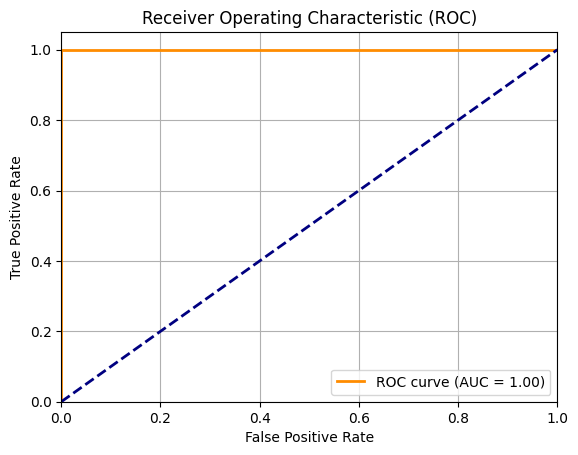

spotlight                          1.0
goal                               0.0
state_changed_at_weekday_Sunday    0.0
created_at_weekday_Sunday          0.0
created_at_weekday_Saturday        0.0
                                  ... 
app                                0.0
DeadlineWeekend                    0.0
LaunchedTuesday                    0.0
TOPCOUNTRY                         0.0
category_grouped_Web               0.0
Length: 77, dtype: float64
Tree depth 2
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0000
Standard deviation of accuracy: 0.0000


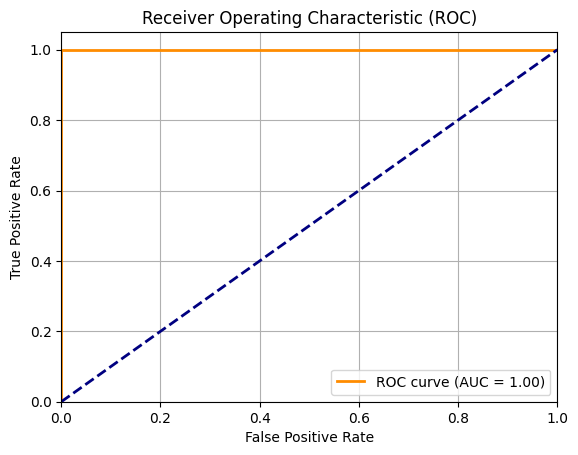

spotlight                          1.0
goal                               0.0
state_changed_at_weekday_Sunday    0.0
created_at_weekday_Sunday          0.0
created_at_weekday_Saturday        0.0
                                  ... 
app                                0.0
DeadlineWeekend                    0.0
LaunchedTuesday                    0.0
TOPCOUNTRY                         0.0
category_grouped_Web               0.0
Length: 77, dtype: float64
Tree depth 3
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0000
Standard deviation of accuracy: 0.0000


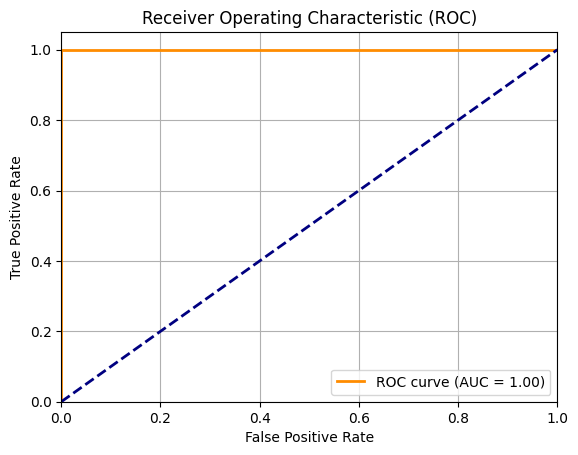

spotlight                          1.0
goal                               0.0
state_changed_at_weekday_Sunday    0.0
created_at_weekday_Sunday          0.0
created_at_weekday_Saturday        0.0
                                  ... 
app                                0.0
DeadlineWeekend                    0.0
LaunchedTuesday                    0.0
TOPCOUNTRY                         0.0
category_grouped_Web               0.0
Length: 77, dtype: float64
Tree depth 4
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy: 1.0000
Standard deviation of accuracy: 0.0000


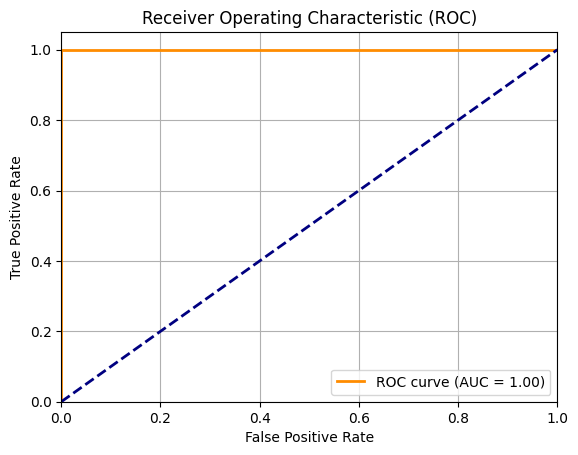

In [64]:
for i in range(1, 5):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    cv_scores = cross_val_score(clf, X, y, cv=10)

    #examine the feature importance
    importances = clf.feature_importances_
    feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print(feature_ranks)
    #split_feature_index = clf.tree_.feature[0]
    #print("Split on feature:", X.columns[split_feature_index])

    print(f"Tree depth {i}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f}")
    print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

    y_scores = clf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
        

In [65]:
#messing around with sample prediction
print(clf.predict(X.iloc[0:1]))

[0]


`Spotlight` is a problem here. It seems that the target is leaked to the training by the `spotlight`. Looking more into it, the spotlight on kickstarter features projects that were already successful. E.g. only a successful kickstarter will reach the kickstarter spotlight.

We need to omit the spotlight feature to avoid leakage of the target feature to the training data.

Re-reading the assignment, only launch day data should be used for predictions so more features should be omitted.

In [66]:
#drop spotlight and any other features that will leak

features_to_drop = ['usd_pledged', 'state_changed_at', 'staff_pick', 'backers_count', 'spotlight', 'launch_to_state_change_days', 'state_changed_at_weekday_Friday', 'state_changed_at_weekday_Monday', 'state_changed_at_weekday_Saturday', 'state_changed_at_weekday_Sunday', 'state_changed_at_weekday_Thursday', 'state_changed_at_weekday_Tuesday', 'state_changed_at_weekday_Wednesday']
print(df.columns.to_list())

def safe_drop_columns(df, features_to_drop):
    for column in features_to_drop:
        if column in df.columns.tolist():
            df.drop(column, axis=1, inplace=True)
safe_drop_columns(df, features_to_drop)

#print(df.columns)

#print('usd_pledged' in df.columns)

#y is the target feature
y = df['SuccessfulBool']
#X consists of all features other than the target feature
X = df.drop('SuccessfulBool', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

['goal', 'disable_communication', 'staff_pick', 'backers_count', 'static_usd_rate', 'usd_pledged', 'spotlight', 'name_len_clean', 'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'SuccessfulBool', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend', 'app', 'help', 'new', 'world', 'canceled', 'country_grouped_CA', 'country_grouped_GB', 'country_grouped_Other', 'country_grouped_US', 'currency_grouped_CAD', 'currency_grouped_EUR', 'currency_grouped_GBP', 'currency_grouped_Other', 'currency_grouped_USD', 'deadline_weekday_Friday', 'deadline_weekday_Monday', 'deadline_weekday_Saturday', 'deadline_weekday_Sunday', 'deadline_weekday_Thursday', 'deadline_weekday_Tuesday', 'deadline_weekday_Wednesday', 'state_changed_at_weekday_Friday', 'state_changed_at_weekday_Mond

Tree depth 4
min_samples_leaf 2
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


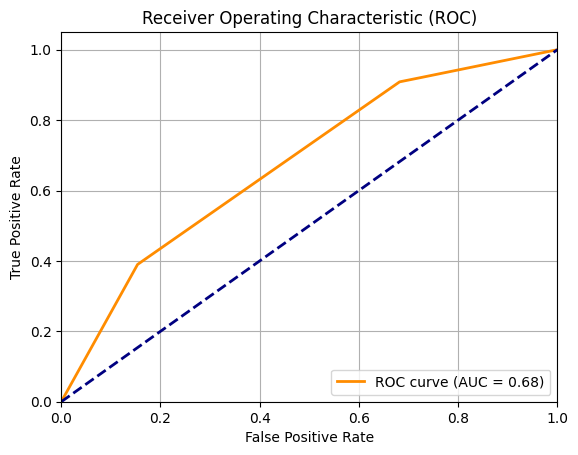

Tree depth 4
min_samples_leaf 3
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


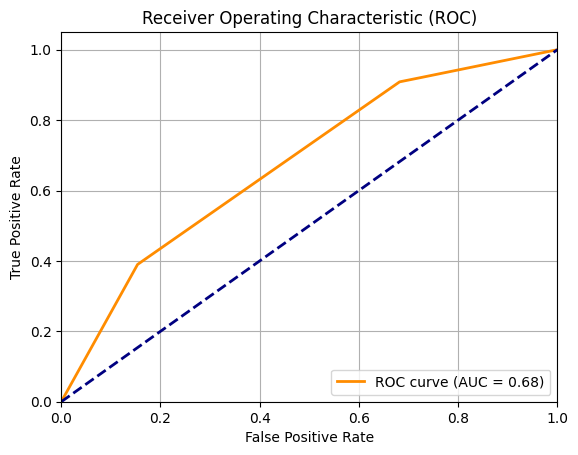

Tree depth 4
min_samples_leaf 4
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


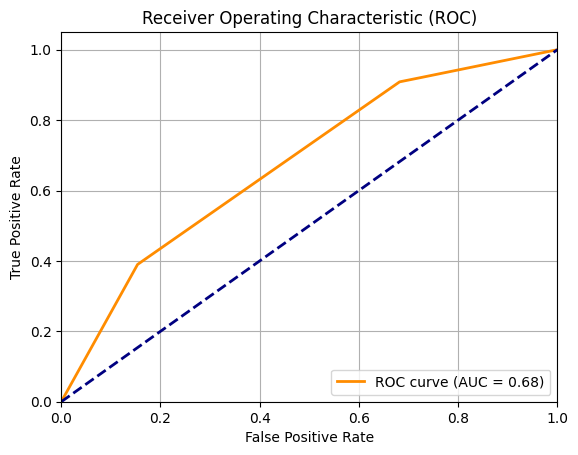

Tree depth 4
min_samples_leaf 5
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


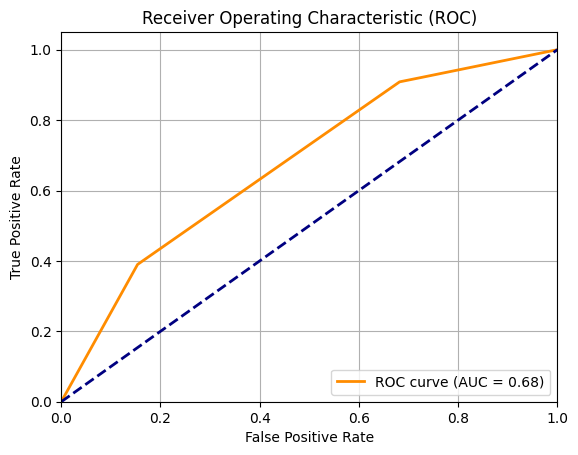

Tree depth 4
min_samples_leaf 6
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


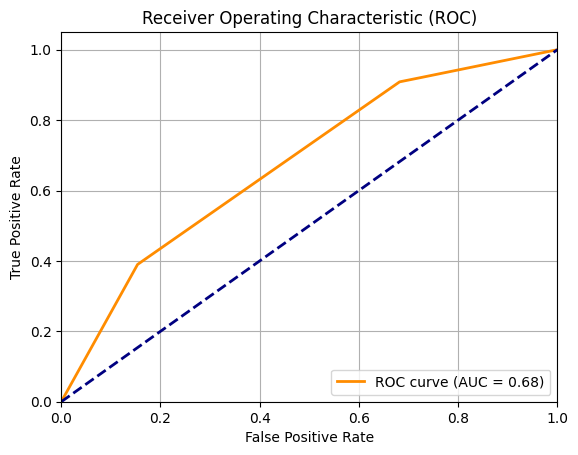

Tree depth 4
min_samples_leaf 7
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


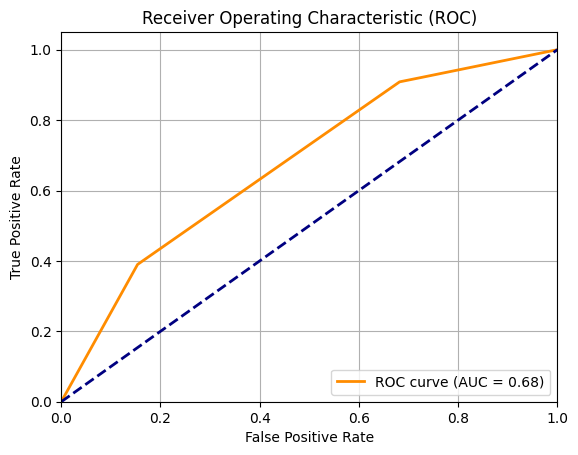

Tree depth 4
min_samples_leaf 8
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


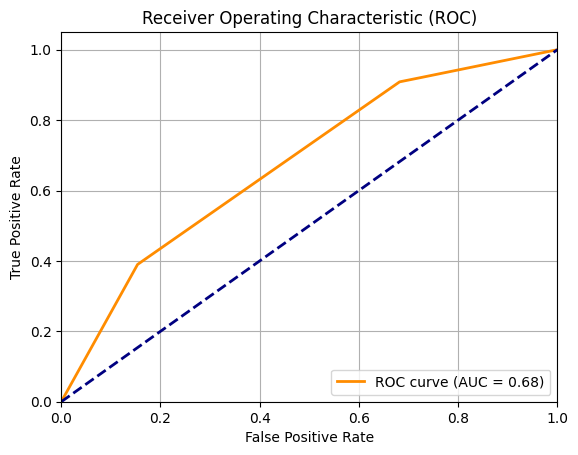

Tree depth 4
min_samples_leaf 9
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


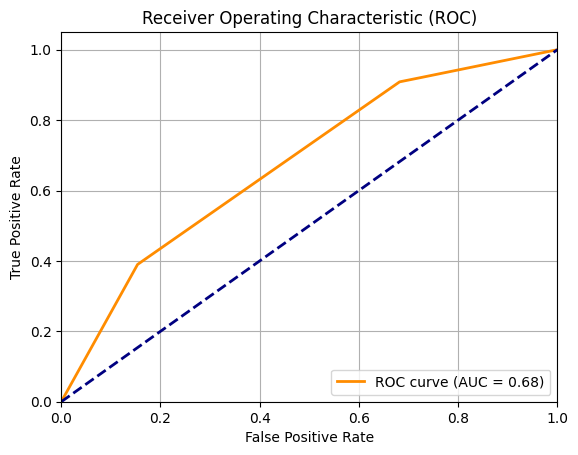

Tree depth 4
min_samples_leaf 10
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


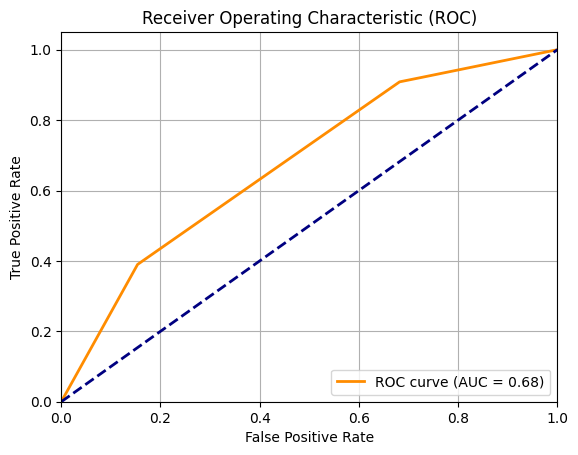

Tree depth 4
min_samples_leaf 11
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


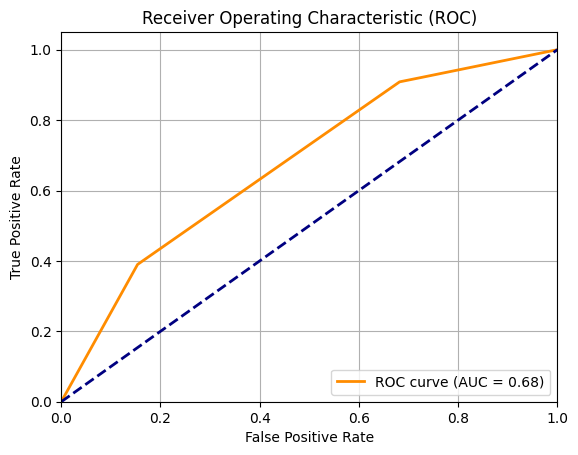

Tree depth 4
min_samples_leaf 12
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


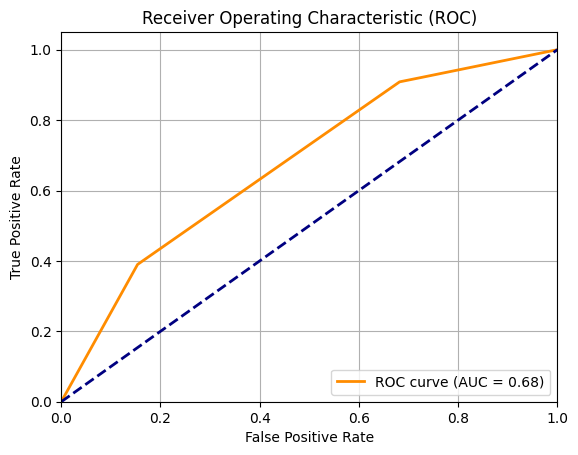

Tree depth 4
min_samples_leaf 13
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


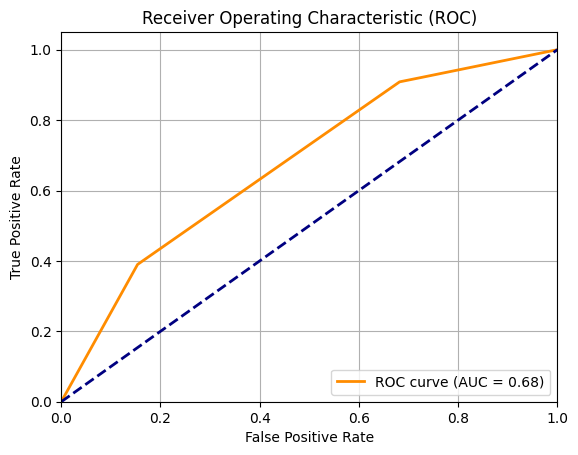

Tree depth 4
min_samples_leaf 14
goal                     0.540420
category_grouped_Web     0.247963
create_to_launch_days    0.211617
dtype: float64
Cross-validation scores: [0.51501938 0.59253876 0.70867668 0.79301987 0.63305865 0.70431411
 0.6980126  0.71013088 0.70964615 0.68880271]
Mean accuracy: 0.6753
Standard deviation of accuracy: 0.0730


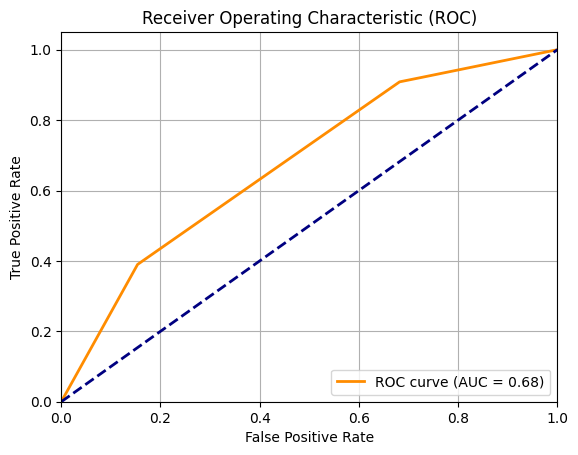

Tree depth 4
min_samples_leaf 2
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


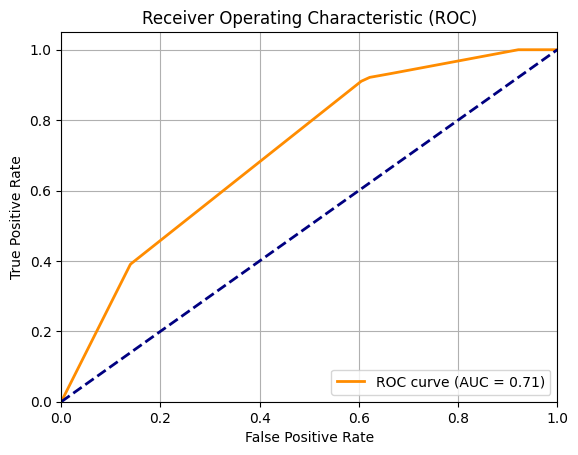

Tree depth 4
min_samples_leaf 3
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


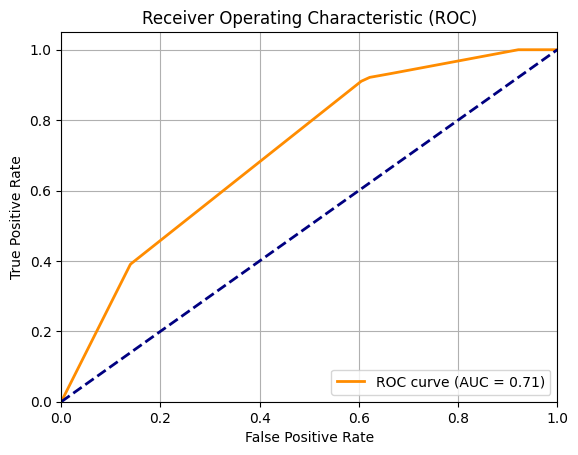

Tree depth 4
min_samples_leaf 4
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


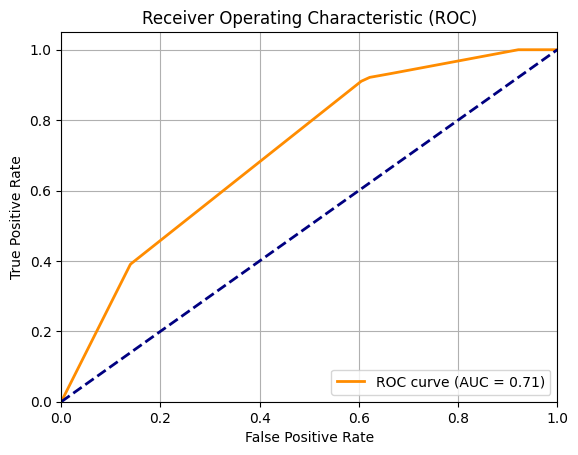

Tree depth 4
min_samples_leaf 5
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


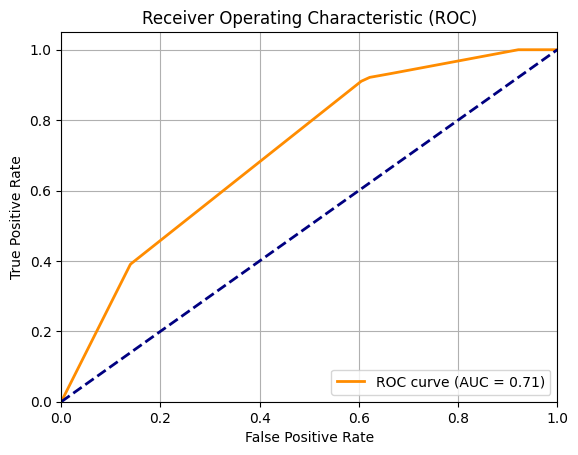

Tree depth 4
min_samples_leaf 6
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


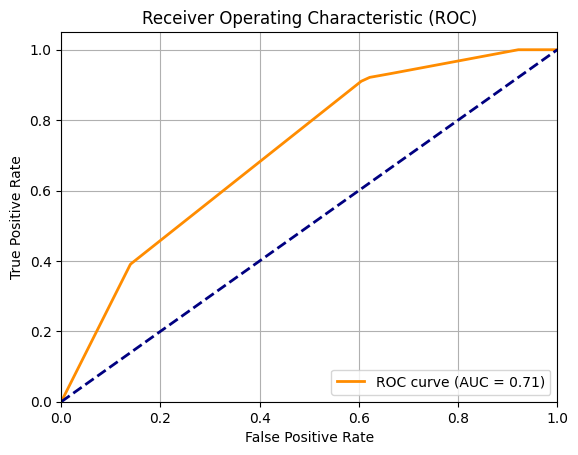

Tree depth 4
min_samples_leaf 7
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


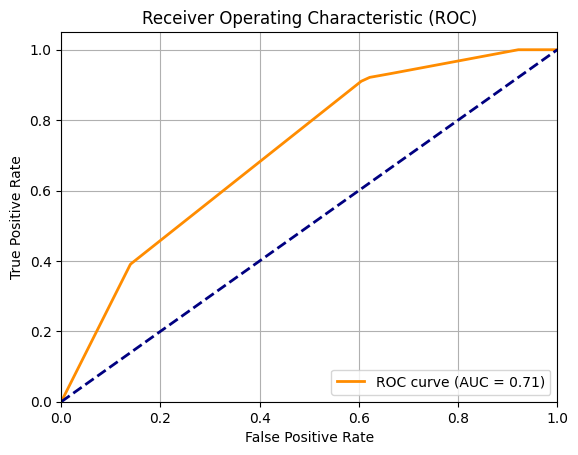

Tree depth 4
min_samples_leaf 8
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


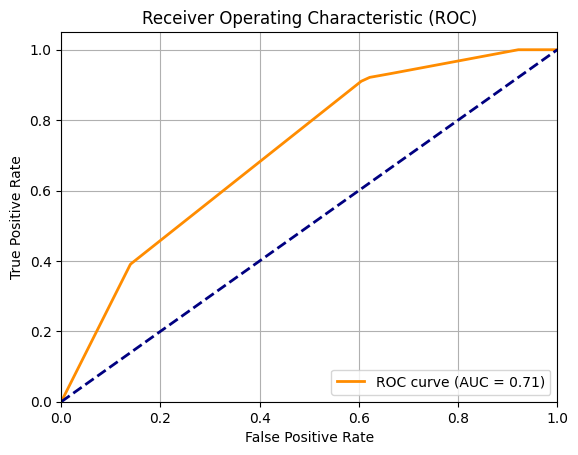

Tree depth 4
min_samples_leaf 9
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


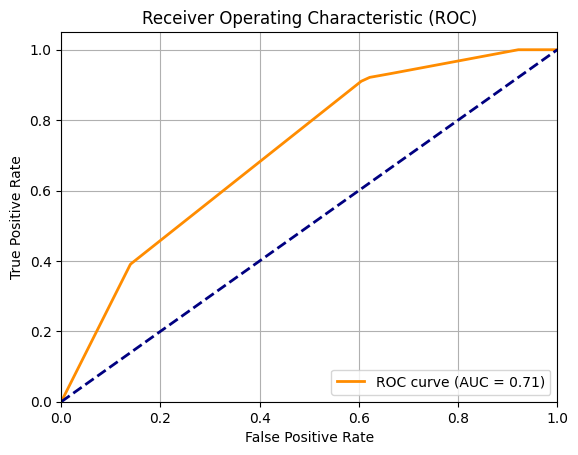

Tree depth 4
min_samples_leaf 10
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


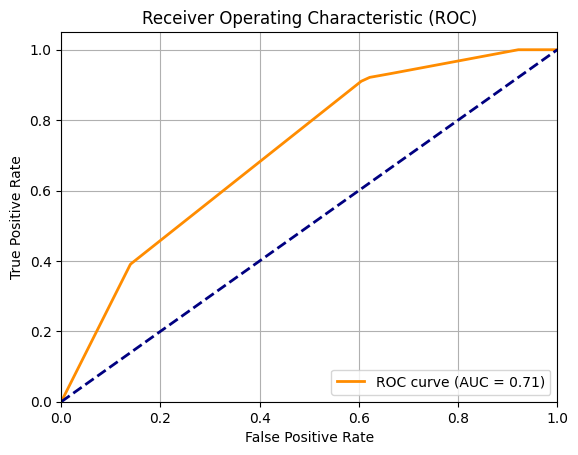

Tree depth 4
min_samples_leaf 11
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


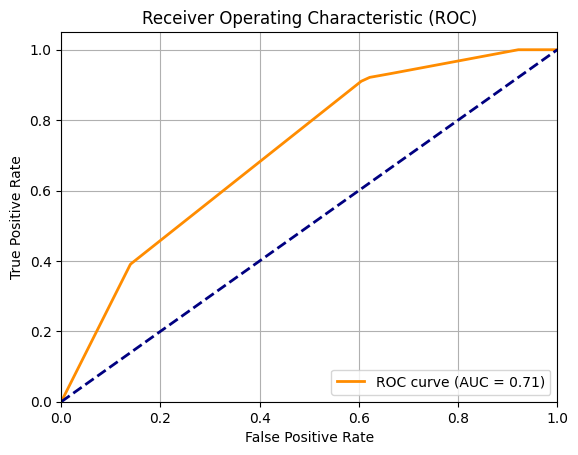

Tree depth 4
min_samples_leaf 12
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


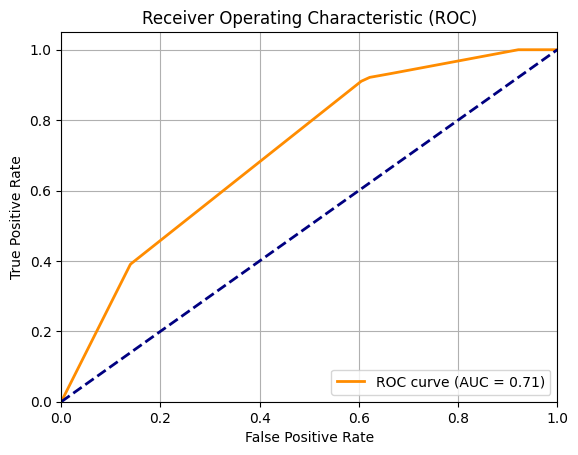

Tree depth 4
min_samples_leaf 13
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


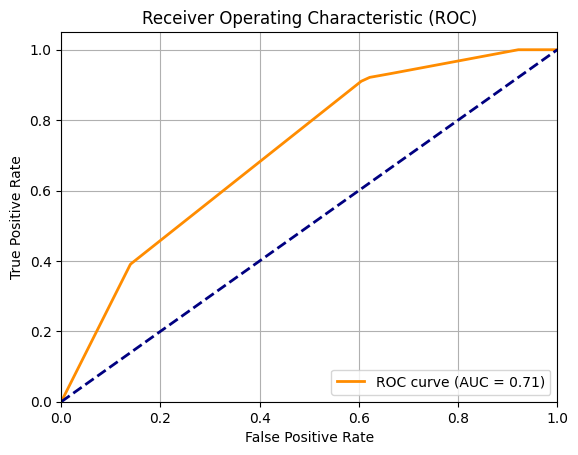

Tree depth 4
min_samples_leaf 14
goal                     0.407028
canceled                 0.231239
category_grouped_Web     0.183378
create_to_launch_days    0.156498
launched_at_yr           0.021857
dtype: float64
Cross-validation scores: [0.47771318 0.57945736 0.70867668 0.52593311 0.63548231 0.72418808
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6493
Standard deviation of accuracy: 0.0863


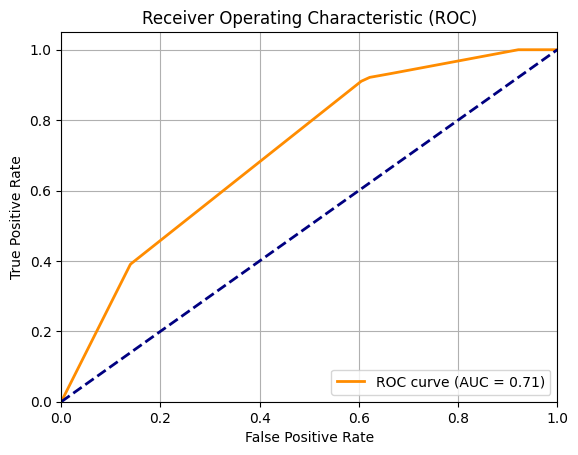

Tree depth 4
min_samples_leaf 2
goal                         0.343807
category_grouped_Web         0.239698
canceled                     0.189504
create_to_launch_days        0.132911
category_grouped_Software    0.072088
launched_at_yr               0.017912
created_at_hr                0.004081
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


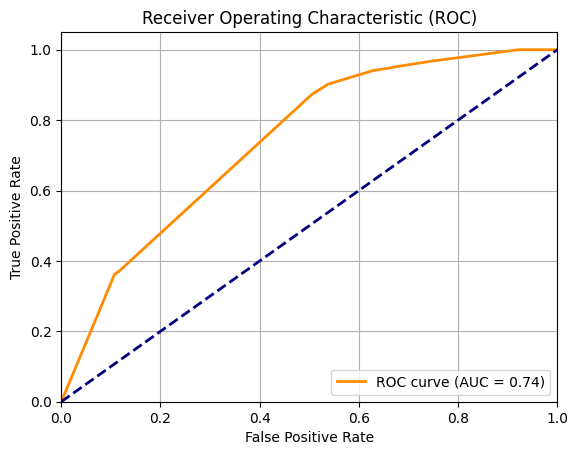

Tree depth 4
min_samples_leaf 3
goal                         0.343807
category_grouped_Web         0.239698
canceled                     0.189504
create_to_launch_days        0.132911
category_grouped_Software    0.072088
launched_at_yr               0.017912
created_at_hr                0.004081
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


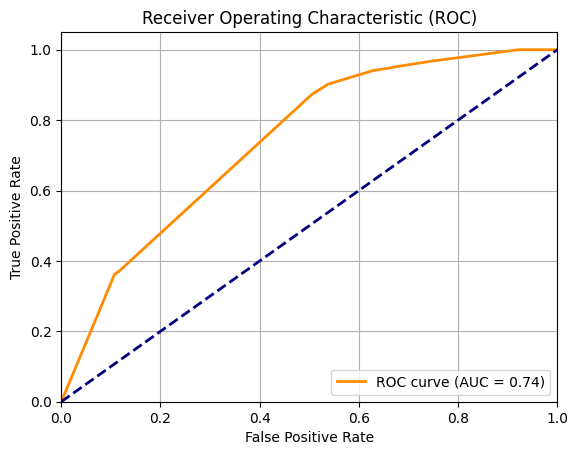

Tree depth 4
min_samples_leaf 4
goal                         0.343807
category_grouped_Web         0.239698
canceled                     0.189504
create_to_launch_days        0.132911
category_grouped_Software    0.072088
launched_at_yr               0.017912
created_at_hr                0.004081
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


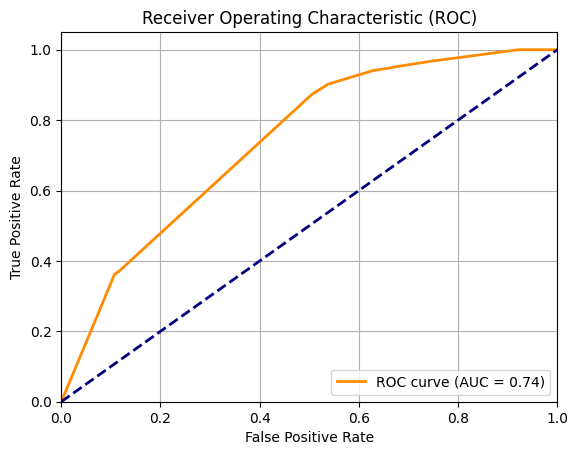

Tree depth 4
min_samples_leaf 5
goal                         0.343807
category_grouped_Web         0.239698
canceled                     0.189504
create_to_launch_days        0.132911
category_grouped_Software    0.072088
launched_at_yr               0.017912
created_at_hr                0.004081
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


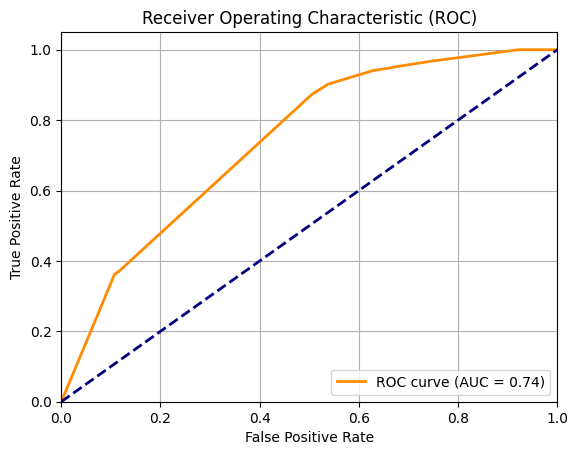

Tree depth 4
min_samples_leaf 6
goal                         0.343807
category_grouped_Web         0.239698
canceled                     0.189504
create_to_launch_days        0.132911
category_grouped_Software    0.072088
launched_at_yr               0.017912
created_at_hr                0.004081
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


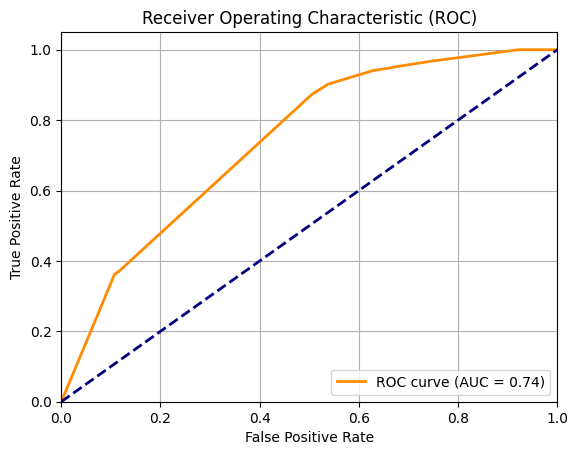

Tree depth 4
min_samples_leaf 7
goal                         0.344302
category_grouped_Web         0.240043
canceled                     0.189776
create_to_launch_days        0.133103
category_grouped_Software    0.072191
launched_at_yr               0.017938
created_at_hr                0.002648
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


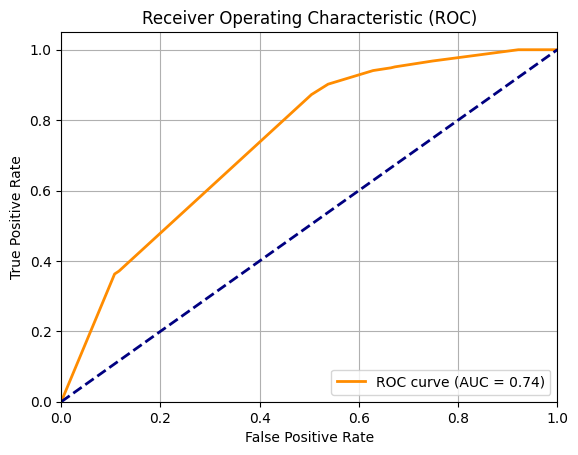

Tree depth 4
min_samples_leaf 8
goal                         0.344597
category_grouped_Web         0.240249
canceled                     0.189939
create_to_launch_days        0.135008
category_grouped_Software    0.072253
launched_at_yr               0.017953
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


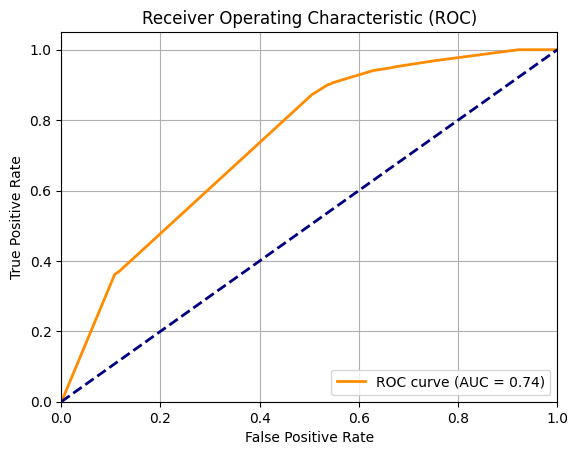

Tree depth 4
min_samples_leaf 9
goal                         0.344597
category_grouped_Web         0.240249
canceled                     0.189939
create_to_launch_days        0.135008
category_grouped_Software    0.072253
launched_at_yr               0.017953
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


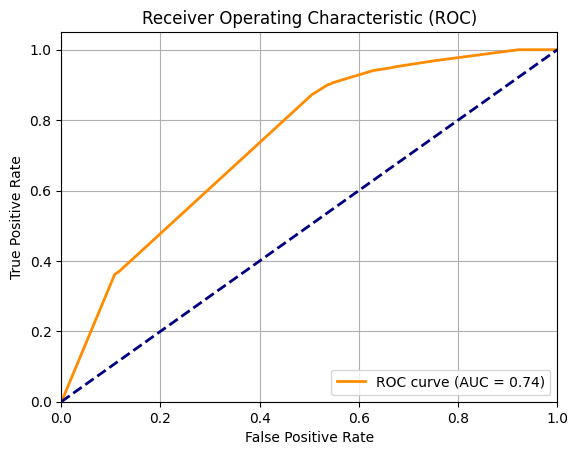

Tree depth 4
min_samples_leaf 10
goal                         0.344858
category_grouped_Web         0.240431
canceled                     0.190083
create_to_launch_days        0.134353
category_grouped_Software    0.072308
launched_at_yr               0.017967
dtype: float64
Cross-validation scores: [0.4878876  0.5629845  0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0903


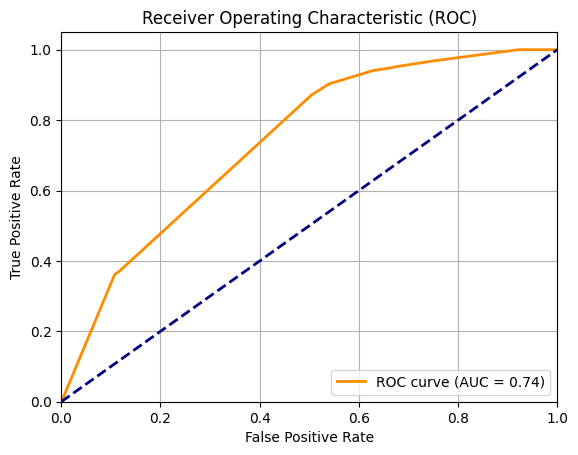

Tree depth 4
min_samples_leaf 11
goal                         0.344887
category_grouped_Web         0.240451
canceled                     0.190099
create_to_launch_days        0.134281
category_grouped_Software    0.072314
launched_at_yr               0.017968
dtype: float64
Cross-validation scores: [0.4878876  0.5625     0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0904


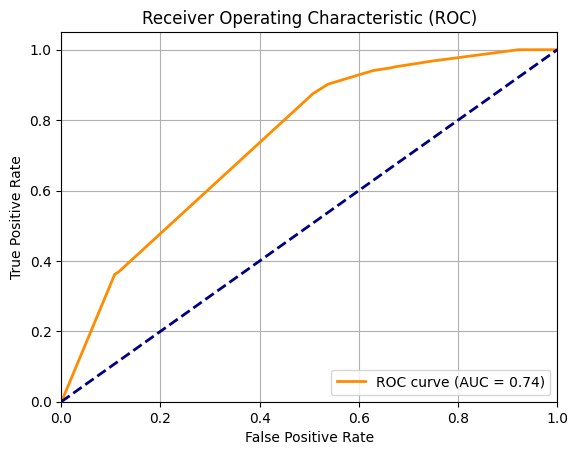

Tree depth 4
min_samples_leaf 12
goal                         0.344887
category_grouped_Web         0.240451
canceled                     0.190099
create_to_launch_days        0.134281
category_grouped_Software    0.072314
launched_at_yr               0.017968
dtype: float64
Cross-validation scores: [0.4878876  0.5625     0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0904


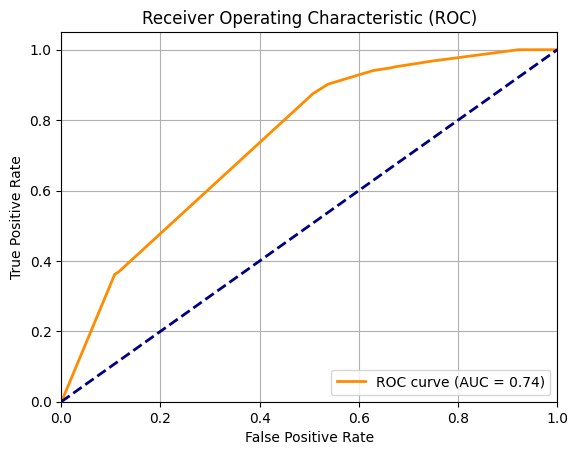

Tree depth 4
min_samples_leaf 13
goal                         0.345216
category_grouped_Web         0.240680
canceled                     0.190280
create_to_launch_days        0.133456
category_grouped_Software    0.072383
launched_at_yr               0.017985
dtype: float64
Cross-validation scores: [0.4878876  0.5625     0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0904


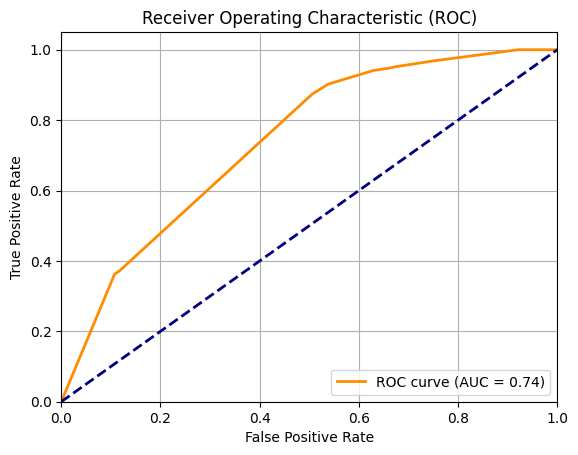

Tree depth 4
min_samples_leaf 14
goal                         0.345216
category_grouped_Web         0.240680
canceled                     0.190280
create_to_launch_days        0.133456
category_grouped_Software    0.072383
launched_at_yr               0.017985
dtype: float64
Cross-validation scores: [0.4878876  0.5625     0.7401842  0.52593311 0.63936016 0.74503151
 0.70285991 0.71934077 0.72467281 0.69510422]
Mean accuracy: 0.6543
Standard deviation of accuracy: 0.0904


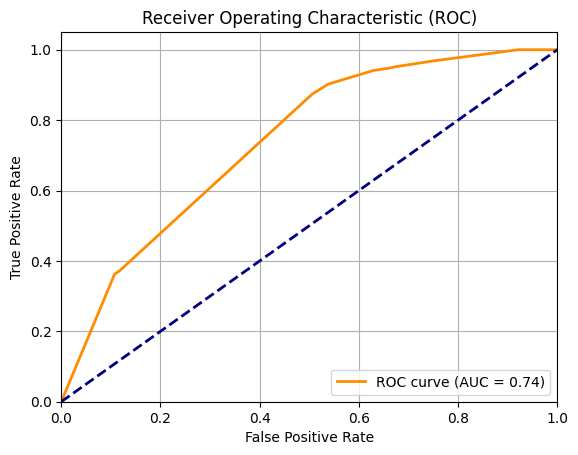

Tree depth 4
min_samples_leaf 2
goal                         0.301652
category_grouped_Web         0.217821
canceled                     0.165195
category_grouped_Software    0.123434
create_to_launch_days        0.118739
disable_communication        0.026884
launched_at_yr               0.015614
category_grouped_Hardware    0.012237
static_usd_rate              0.005280
launched_at_day              0.003871
created_at_hr                0.003558
deadline_day                 0.002779
launched_at_hr               0.001706
new                          0.001230
dtype: float64
Cross-validation scores: [0.4878876  0.56492248 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6465
Standard deviation of accuracy: 0.0923


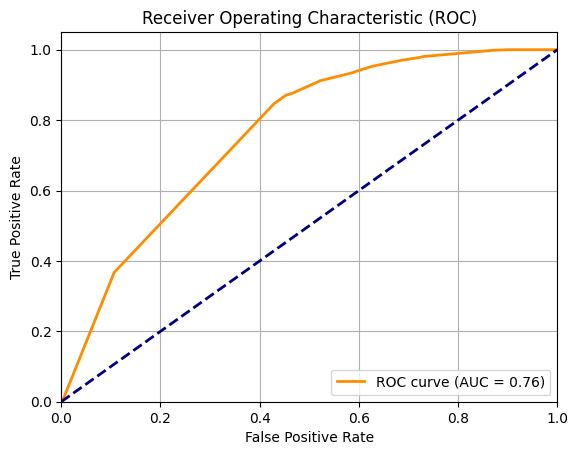

Tree depth 4
min_samples_leaf 3
goal                         0.301652
category_grouped_Web         0.217821
canceled                     0.165195
category_grouped_Software    0.123434
create_to_launch_days        0.118739
disable_communication        0.026884
launched_at_yr               0.015614
category_grouped_Hardware    0.012237
static_usd_rate              0.005280
launched_at_day              0.003871
created_at_hr                0.003558
deadline_day                 0.002779
launched_at_hr               0.001706
new                          0.001230
dtype: float64
Cross-validation scores: [0.4878876  0.56492248 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6465
Standard deviation of accuracy: 0.0923


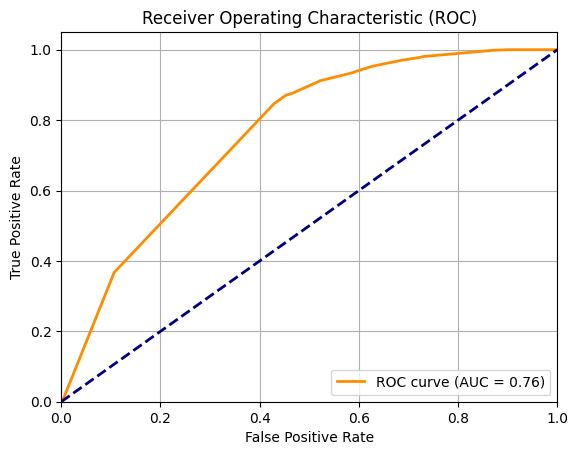

Tree depth 4
min_samples_leaf 4
goal                         0.302039
category_grouped_Web         0.218101
canceled                     0.165407
category_grouped_Software    0.123592
create_to_launch_days        0.118891
disable_communication        0.026919
launched_at_yr               0.015634
category_grouped_Hardware    0.012253
created_at_hr                0.005862
static_usd_rate              0.005287
launched_at_day              0.003876
new                          0.001232
country_grouped_US           0.000907
dtype: float64
Cross-validation scores: [0.4878876  0.56492248 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6465
Standard deviation of accuracy: 0.0923


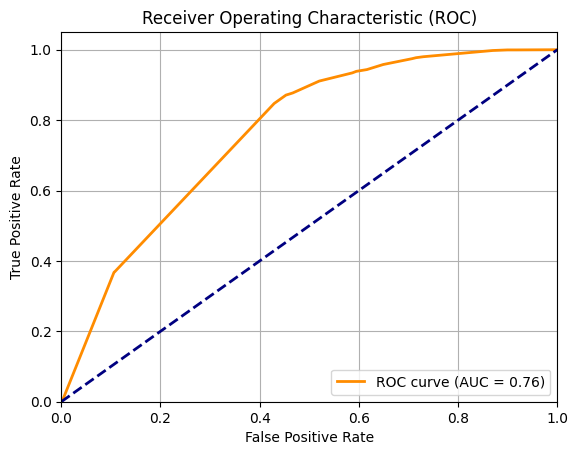

Tree depth 4
min_samples_leaf 5
goal                         0.302207
category_grouped_Web         0.218222
canceled                     0.165499
category_grouped_Software    0.123661
create_to_launch_days        0.118957
disable_communication        0.026934
launched_at_yr               0.015643
category_grouped_Hardware    0.012260
created_at_hr                0.005865
static_usd_rate              0.005290
created_at_month             0.003322
new                          0.001233
country_grouped_US           0.000908
dtype: float64
Cross-validation scores: [0.4878876  0.56492248 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6465
Standard deviation of accuracy: 0.0923


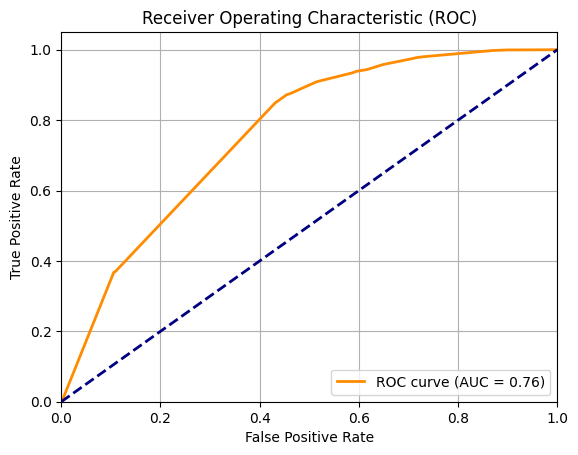

Tree depth 4
min_samples_leaf 6
goal                         0.302207
category_grouped_Web         0.218222
canceled                     0.165499
category_grouped_Software    0.123661
create_to_launch_days        0.118957
disable_communication        0.026934
launched_at_yr               0.015643
category_grouped_Hardware    0.012260
created_at_hr                0.005865
static_usd_rate              0.005290
created_at_month             0.003322
new                          0.001233
country_grouped_US           0.000908
dtype: float64
Cross-validation scores: [0.4878876  0.56492248 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6465
Standard deviation of accuracy: 0.0923


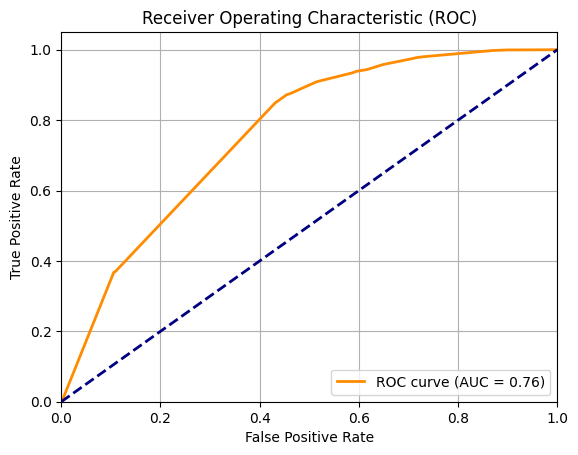

Tree depth 4
min_samples_leaf 7
goal                         0.302640
category_grouped_Web         0.218535
canceled                     0.165737
category_grouped_Software    0.123838
create_to_launch_days        0.119128
disable_communication        0.026972
launched_at_yr               0.015665
category_grouped_Hardware    0.012277
static_usd_rate              0.005297
created_at_hr                0.004440
created_at_month             0.003327
new                          0.001234
country_grouped_US           0.000909
dtype: float64
Cross-validation scores: [0.4878876  0.56492248 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6465
Standard deviation of accuracy: 0.0923


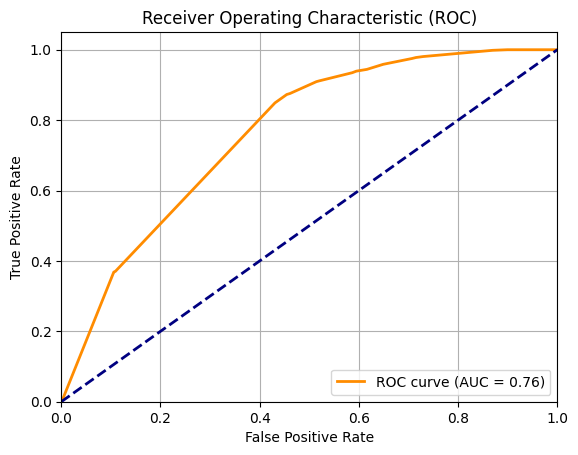

Tree depth 4
min_samples_leaf 8
goal                         0.303387
category_grouped_Web         0.219074
canceled                     0.166145
category_grouped_Software    0.124144
create_to_launch_days        0.120988
disable_communication        0.027039
launched_at_yr               0.015704
category_grouped_Hardware    0.012308
static_usd_rate              0.005310
created_at_month             0.003335
new                          0.001238
currency_grouped_USD         0.000911
launched_at_day              0.000419
dtype: float64
Cross-validation scores: [0.4878876  0.56492248 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6465
Standard deviation of accuracy: 0.0923


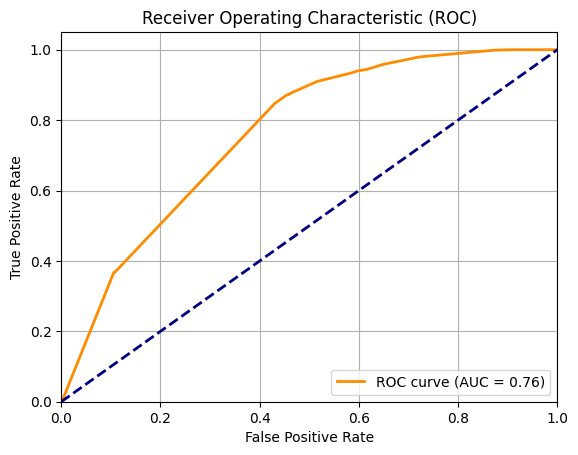

Tree depth 4
min_samples_leaf 9
goal                         0.303576
category_grouped_Web         0.219210
canceled                     0.166249
category_grouped_Software    0.124221
create_to_launch_days        0.121063
disable_communication        0.027056
launched_at_yr               0.015714
category_grouped_Hardware    0.012315
static_usd_rate              0.005314
created_at_month             0.003337
new                          0.001035
currency_grouped_USD         0.000912
dtype: float64
Cross-validation scores: [0.4878876  0.57751938 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6477
Standard deviation of accuracy: 0.0912


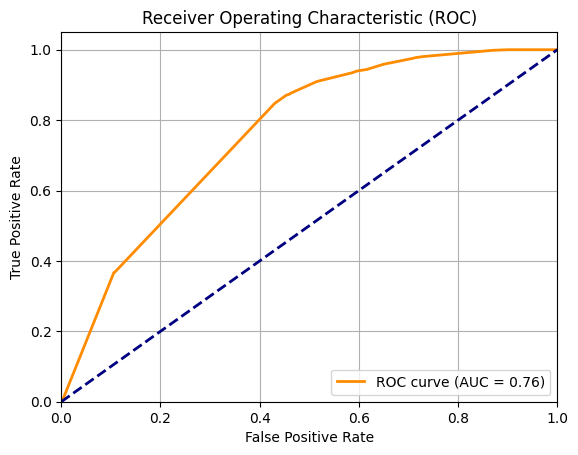

Tree depth 4
min_samples_leaf 10
goal                         0.303826
category_grouped_Web         0.219391
canceled                     0.166386
category_grouped_Software    0.124323
create_to_launch_days        0.120501
disable_communication        0.027078
launched_at_yr               0.015727
category_grouped_Hardware    0.012325
static_usd_rate              0.005318
created_at_month             0.003340
currency_grouped_USD         0.000913
new                          0.000874
dtype: float64
Cross-validation scores: [0.4878876  0.57751938 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6477
Standard deviation of accuracy: 0.0912


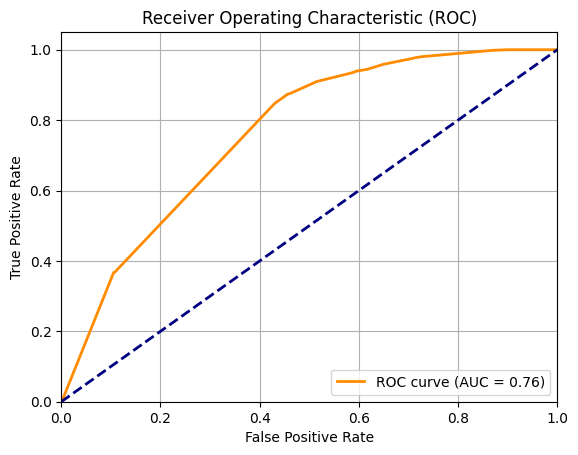

Tree depth 4
min_samples_leaf 11
goal                         0.303941
category_grouped_Web         0.219474
canceled                     0.166449
category_grouped_Software    0.124370
create_to_launch_days        0.120473
disable_communication        0.027088
launched_at_yr               0.016300
category_grouped_Hardware    0.012330
static_usd_rate              0.005320
created_at_month             0.003341
currency_grouped_USD         0.000913
dtype: float64
Cross-validation scores: [0.4878876  0.57848837 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6478
Standard deviation of accuracy: 0.0912


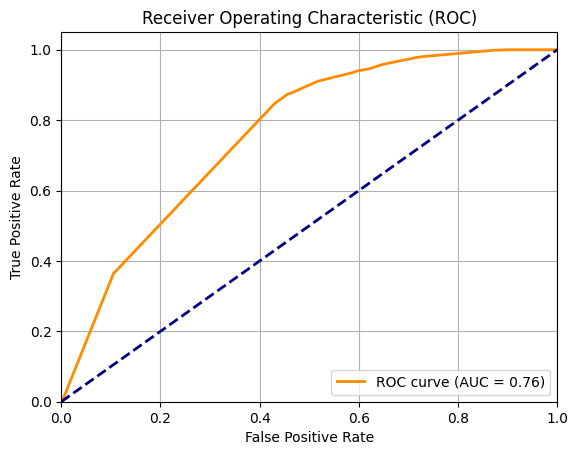

Tree depth 4
min_samples_leaf 12
goal                         0.303941
category_grouped_Web         0.219474
canceled                     0.166449
category_grouped_Software    0.124370
create_to_launch_days        0.120473
disable_communication        0.027088
launched_at_yr               0.016300
category_grouped_Hardware    0.012330
static_usd_rate              0.005320
created_at_month             0.003341
currency_grouped_USD         0.000913
dtype: float64
Cross-validation scores: [0.4874031  0.5755814  0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6475
Standard deviation of accuracy: 0.0915


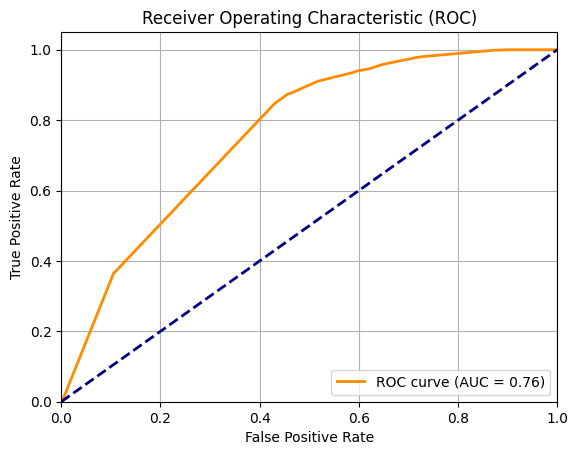

Tree depth 4
min_samples_leaf 13
goal                         0.304195
category_grouped_Web         0.219657
canceled                     0.166588
category_grouped_Software    0.124474
create_to_launch_days        0.119740
disable_communication        0.027111
launched_at_yr               0.016313
category_grouped_Hardware    0.012340
static_usd_rate              0.005325
created_at_month             0.003344
currency_grouped_USD         0.000914
dtype: float64
Cross-validation scores: [0.4874031  0.5755814  0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6475
Standard deviation of accuracy: 0.0915


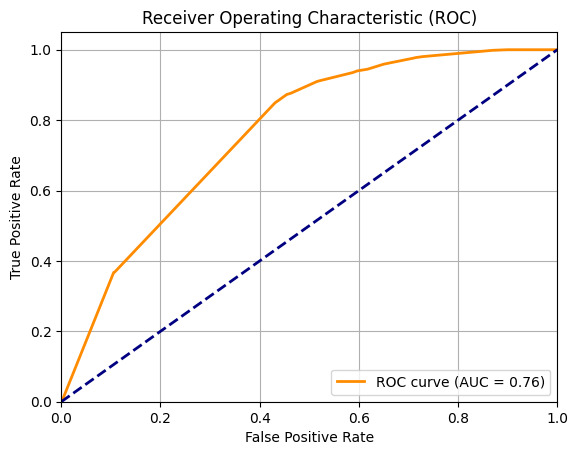

Tree depth 4
min_samples_leaf 14
goal                         0.304195
category_grouped_Web         0.219657
canceled                     0.166588
category_grouped_Software    0.124474
create_to_launch_days        0.119740
disable_communication        0.027111
launched_at_yr               0.016313
category_grouped_Hardware    0.012340
static_usd_rate              0.005325
created_at_month             0.003344
currency_grouped_USD         0.000914
dtype: float64
Cross-validation scores: [0.4874031  0.57606589 0.74163839 0.5273873  0.67813863 0.74503151
 0.5758604  0.72321861 0.72370334 0.69704314]
Mean accuracy: 0.6475
Standard deviation of accuracy: 0.0914


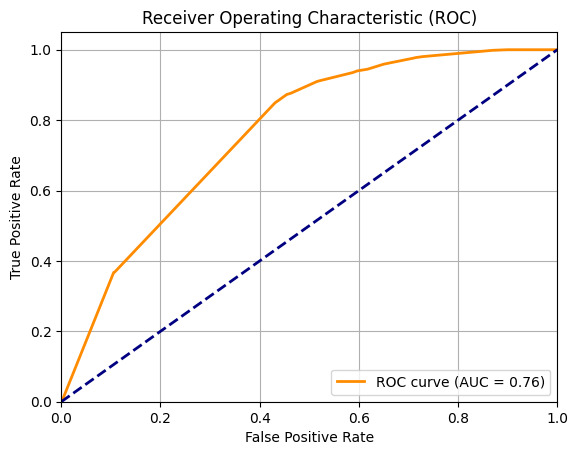

Tree depth 4
min_samples_leaf 2
goal                         0.320841
category_grouped_Web         0.194785
canceled                     0.147725
category_grouped_Software    0.115546
create_to_launch_days        0.106524
launched_at_yr               0.036908
disable_communication        0.024041
category_grouped_Hardware    0.010943
static_usd_rate              0.007490
launched_at_day              0.005306
created_at_month             0.004926
launch_to_deadline_days      0.004753
new                          0.004592
launched_at_hr               0.003670
help                         0.003408
created_at_hr                0.003287
deadline_day                 0.002485
name_len_clean               0.001902
currency_grouped_USD         0.000868
dtype: float64
Cross-validation scores: [0.48885659 0.59350775 0.74115366 0.52690257 0.66844401 0.74212312
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6500
Standard deviation of accuracy: 0.0903


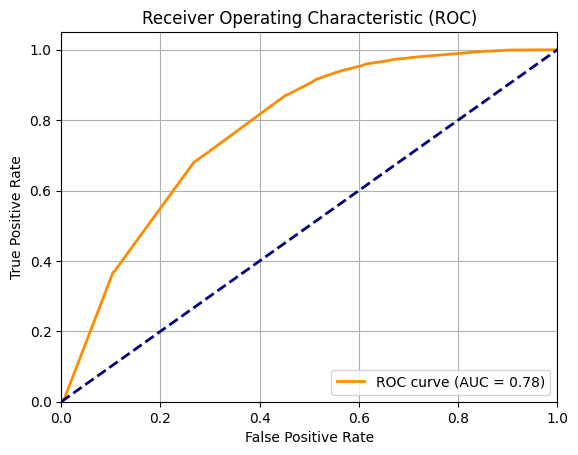

Tree depth 4
min_samples_leaf 3
goal                          0.320844
category_grouped_Web          0.194787
canceled                      0.147726
category_grouped_Software     0.115547
create_to_launch_days         0.106525
launched_at_yr                0.036908
disable_communication         0.024041
category_grouped_Hardware     0.010943
static_usd_rate               0.006900
launched_at_day               0.005306
created_at_month              0.004926
launch_to_deadline_days       0.004753
new                           0.004592
launched_at_hr                0.003670
help                          0.003408
created_at_hr                 0.003287
deadline_day                  0.002485
name_len_clean                0.001902
currency_grouped_USD          0.000868
created_at_weekday_Tuesday    0.000582
dtype: float64
Cross-validation scores: [0.48885659 0.59350775 0.74115366 0.52690257 0.66844401 0.74309258
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6501
Standard devi

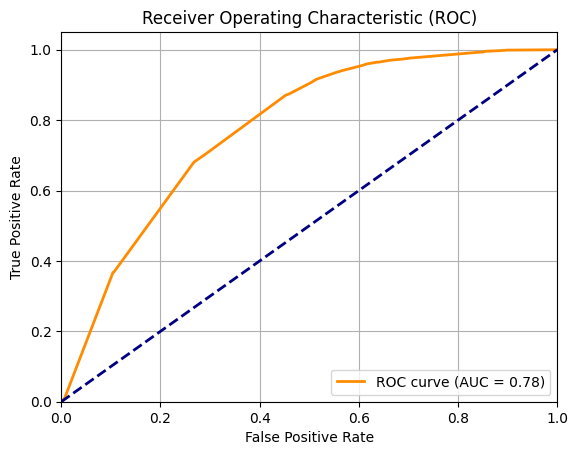

Tree depth 4
min_samples_leaf 4
goal                          0.322339
category_grouped_Web          0.194892
canceled                      0.147806
category_grouped_Software     0.115609
create_to_launch_days         0.106582
launched_at_yr                0.036928
disable_communication         0.024054
category_grouped_Hardware     0.010949
static_usd_rate               0.006903
launch_to_deadline_days       0.006491
created_at_hr                 0.005343
new                           0.004594
created_at_month              0.003590
launched_at_day               0.003464
help                          0.003410
name_len_clean                0.002620
launched_at_hr                0.002146
deadline_month                0.000886
currency_grouped_USD          0.000811
created_at_weekday_Tuesday    0.000582
dtype: float64
Cross-validation scores: [0.48885659 0.59447674 0.74115366 0.52690257 0.66844401 0.74309258
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6502
Standard devi

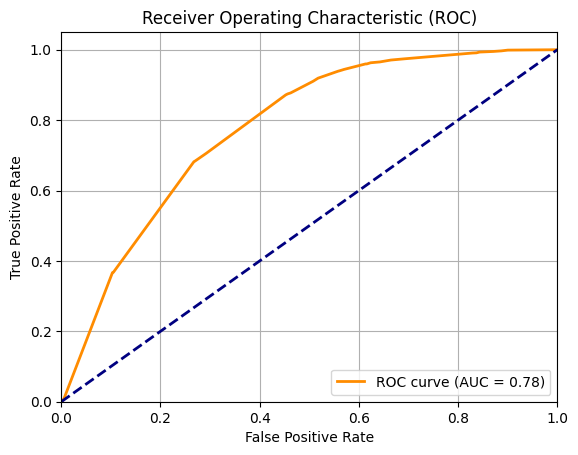

Tree depth 4
min_samples_leaf 5
goal                          0.323207
category_grouped_Web          0.195416
canceled                      0.148204
category_grouped_Software     0.115920
create_to_launch_days         0.106869
launched_at_yr                0.037028
disable_communication         0.024119
category_grouped_Hardware     0.010978
static_usd_rate               0.006922
created_at_hr                 0.005358
launch_to_deadline_days       0.004827
new                           0.003474
help                          0.003419
created_at_month              0.002975
name_len_clean                0.002627
launched_at_day               0.002176
launched_at_hr                0.002151
created_at_day                0.002045
deadline_month                0.000888
currency_grouped_USD          0.000813
created_at_weekday_Tuesday    0.000584
dtype: float64
Cross-validation scores: [0.48885659 0.59447674 0.74115366 0.52690257 0.66844401 0.74309258
 0.57779932 0.726127   0.72370334 0.711100

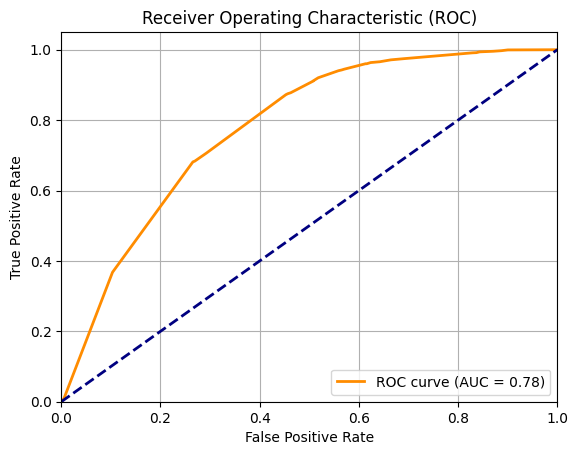

Tree depth 4
min_samples_leaf 6
goal                          0.323854
category_grouped_Web          0.195807
canceled                      0.148500
category_grouped_Software     0.116152
create_to_launch_days         0.107083
launched_at_yr                0.037102
disable_communication         0.024167
category_grouped_Hardware     0.011000
created_at_hr                 0.007640
static_usd_rate               0.006936
launch_to_deadline_days       0.004836
help                          0.003426
created_at_month              0.002981
name_len_clean                0.002632
launched_at_day               0.002181
launched_at_hr                0.002156
new                           0.001106
created_at_day                0.001040
country_grouped_US            0.000814
created_at_weekday_Tuesday    0.000585
dtype: float64
Cross-validation scores: [0.48885659 0.59447674 0.74115366 0.52690257 0.66844401 0.74309258
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6502
Standard devi

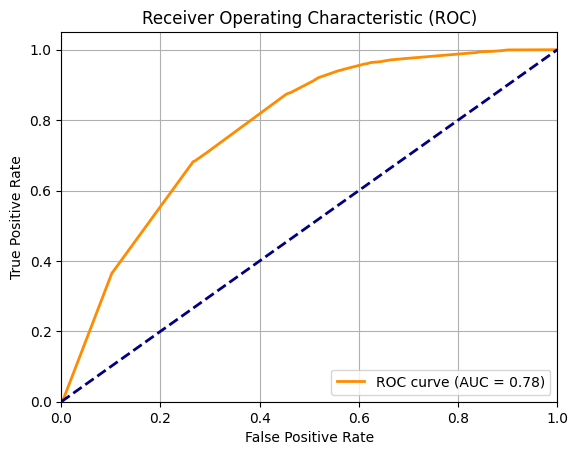

Tree depth 4
min_samples_leaf 7
goal                          0.323275
category_grouped_Web          0.196262
canceled                      0.148845
category_grouped_Software     0.116422
create_to_launch_days         0.110002
launched_at_yr                0.037188
disable_communication         0.024223
category_grouped_Hardware     0.011026
static_usd_rate               0.008089
created_at_hr                 0.006371
help                          0.003434
created_at_month              0.002988
launched_at_day               0.002816
name_len_clean                0.002638
launched_at_hr                0.002161
launch_to_deadline_days       0.001748
new                           0.001109
country_grouped_US            0.000816
created_at_weekday_Tuesday    0.000586
dtype: float64
Cross-validation scores: [0.48885659 0.59447674 0.74115366 0.52690257 0.66844401 0.74260785
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6501
Standard deviation of accuracy: 0.0903


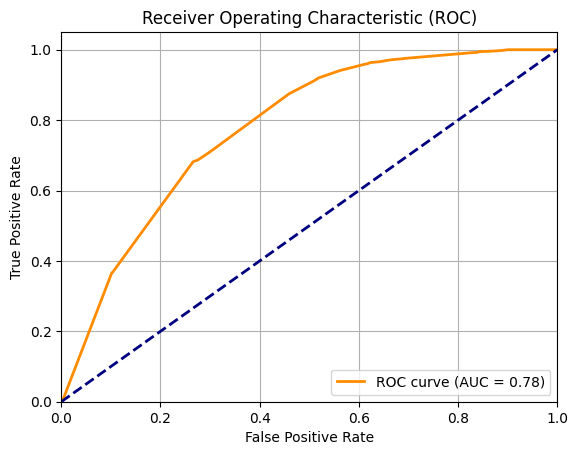

Tree depth 4
min_samples_leaf 8
goal                          0.323991
category_grouped_Web          0.196697
canceled                      0.149175
category_grouped_Software     0.116680
create_to_launch_days         0.112028
launched_at_yr                0.037270
disable_communication         0.024277
category_grouped_Hardware     0.011050
static_usd_rate               0.008107
help                          0.003442
created_at_month              0.002994
launched_at_day               0.002822
name_len_clean                0.002644
created_at_hr                 0.002388
launched_at_hr                0.002165
launch_to_deadline_days       0.001752
new                           0.001111
currency_grouped_USD          0.000818
created_at_weekday_Tuesday    0.000588
dtype: float64
Cross-validation scores: [0.48885659 0.59447674 0.74163839 0.52690257 0.66844401 0.74406205
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6503
Standard deviation of accuracy: 0.0905


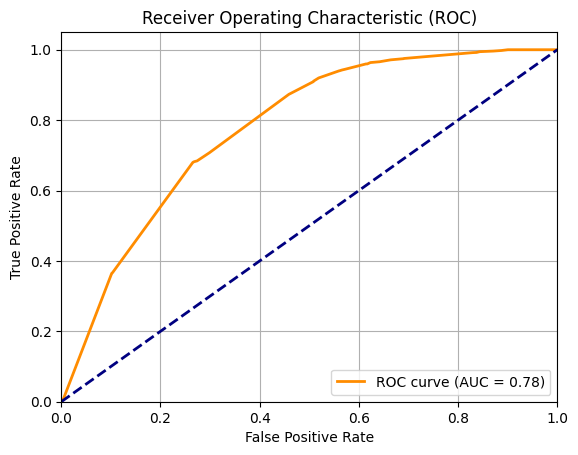

Tree depth 4
min_samples_leaf 9
goal                          0.324556
category_grouped_Web          0.197040
canceled                      0.149435
category_grouped_Software     0.116883
create_to_launch_days         0.111847
launched_at_yr                0.037335
disable_communication         0.024319
category_grouped_Hardware     0.011070
static_usd_rate               0.008121
created_at_month              0.002999
help                          0.002753
name_len_clean                0.002649
created_at_hr                 0.002392
launched_at_day               0.002341
launched_at_hr                0.002169
launch_to_deadline_days       0.001755
new                           0.000930
currency_grouped_USD          0.000820
created_at_weekday_Tuesday    0.000584
dtype: float64
Cross-validation scores: [0.48837209 0.60562016 0.74163839 0.52690257 0.66844401 0.74406205
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6514
Standard deviation of accuracy: 0.0900


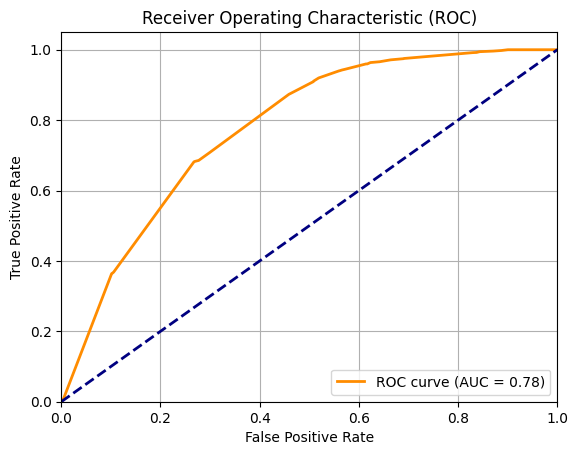

Tree depth 4
min_samples_leaf 10
goal                         0.324978
category_grouped_Web         0.197296
canceled                     0.149629
category_grouped_Software    0.117035
create_to_launch_days        0.111397
launched_at_yr               0.037384
disable_communication        0.024351
category_grouped_Hardware    0.011084
static_usd_rate              0.008132
created_at_month             0.003003
help                         0.002756
name_len_clean               0.002652
created_at_hr                0.002395
launched_at_hr               0.002172
launched_at_day              0.001789
launch_to_deadline_days      0.001757
currency_grouped_USD         0.000821
new                          0.000786
deadline_weekday_Saturday    0.000581
dtype: float64
Cross-validation scores: [0.48885659 0.60465116 0.74163839 0.52690257 0.66844401 0.74406205
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6513
Standard deviation of accuracy: 0.0900


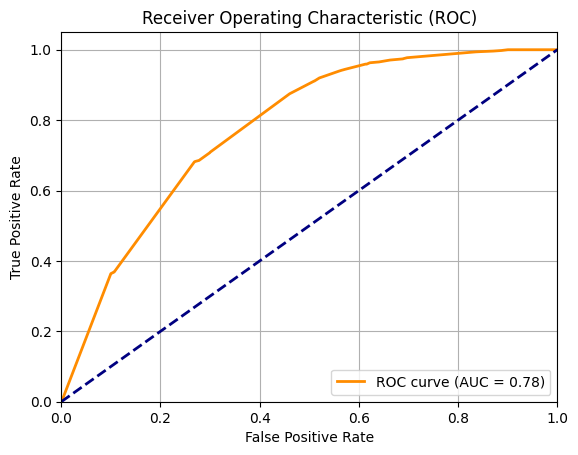

Tree depth 4
min_samples_leaf 11
goal                         0.325117
category_grouped_Web         0.197380
canceled                     0.149693
category_grouped_Software    0.117085
create_to_launch_days        0.111379
launched_at_yr               0.037910
disable_communication        0.024361
category_grouped_Hardware    0.011089
static_usd_rate              0.008135
created_at_month             0.003005
created_at_hr                0.002893
help                         0.002757
name_len_clean               0.002653
launched_at_hr               0.002173
launched_at_day              0.001790
launch_to_deadline_days      0.001758
currency_grouped_USD         0.000821
dtype: float64
Cross-validation scores: [0.48885659 0.60562016 0.74163839 0.52690257 0.66844401 0.74406205
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6514
Standard deviation of accuracy: 0.0899


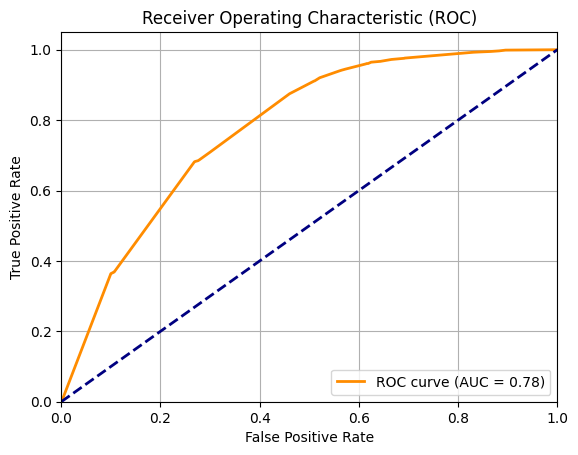

Tree depth 4
min_samples_leaf 12
goal                         0.325117
category_grouped_Web         0.197380
canceled                     0.149693
category_grouped_Software    0.117085
create_to_launch_days        0.111379
launched_at_yr               0.037910
disable_communication        0.024361
category_grouped_Hardware    0.011089
static_usd_rate              0.008135
created_at_month             0.003005
created_at_hr                0.002893
help                         0.002757
name_len_clean               0.002653
launched_at_hr               0.002173
launched_at_day              0.001790
launch_to_deadline_days      0.001758
currency_grouped_USD         0.000821
dtype: float64
Cross-validation scores: [0.48837209 0.59883721 0.74163839 0.52690257 0.66844401 0.74406205
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6507
Standard deviation of accuracy: 0.0904


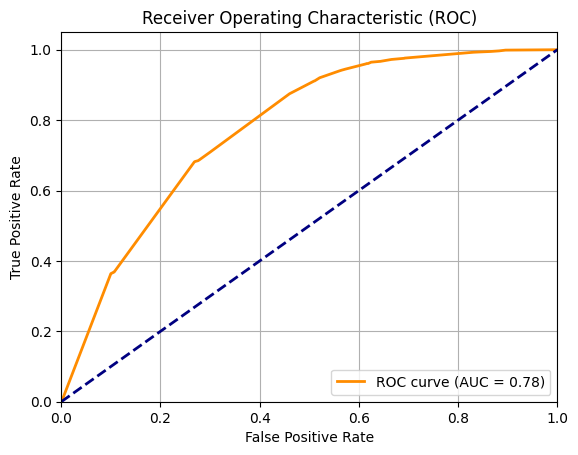

Tree depth 4
min_samples_leaf 13
goal                         0.325360
category_grouped_Web         0.197528
canceled                     0.149805
category_grouped_Software    0.117173
create_to_launch_days        0.110712
launched_at_yr               0.037938
disable_communication        0.024380
category_grouped_Hardware    0.011097
static_usd_rate              0.008141
created_at_month             0.003007
created_at_hr                0.002895
help                         0.002760
name_len_clean               0.002655
launched_at_hr               0.002175
launched_at_day              0.001791
launch_to_deadline_days      0.001759
country_grouped_US           0.000822
dtype: float64
Cross-validation scores: [0.48837209 0.59786822 0.74163839 0.52690257 0.66844401 0.74406205
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6506
Standard deviation of accuracy: 0.0904


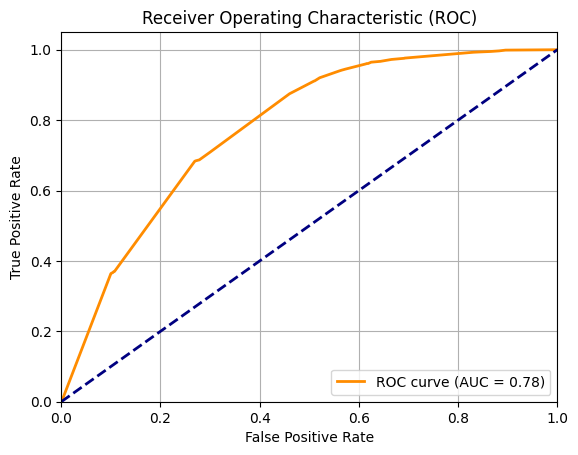

Tree depth 4
min_samples_leaf 14
goal                         0.325366
category_grouped_Web         0.197531
canceled                     0.149808
category_grouped_Software    0.117175
create_to_launch_days        0.110714
launched_at_yr               0.037939
disable_communication        0.024380
category_grouped_Hardware    0.011097
static_usd_rate              0.008142
created_at_month             0.003007
created_at_hr                0.002788
help                         0.002760
name_len_clean               0.002656
launched_at_hr               0.002175
launched_at_day              0.001791
launch_to_deadline_days      0.001759
country_grouped_US           0.000822
deadline_day                 0.000091
dtype: float64
Cross-validation scores: [0.48837209 0.59883721 0.74163839 0.52690257 0.66844401 0.74406205
 0.57779932 0.726127   0.72370334 0.71110034]
Mean accuracy: 0.6507
Standard deviation of accuracy: 0.0904


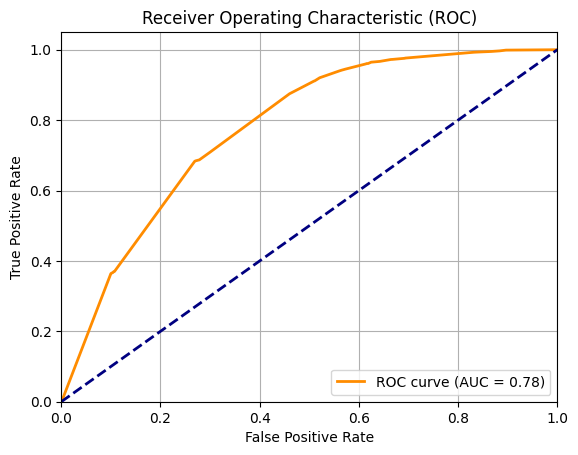

Tree depth 4
min_samples_leaf 2
goal                            0.296045
category_grouped_Web            0.178252
canceled                        0.138860
create_to_launch_days           0.122684
category_grouped_Software       0.105739
launched_at_yr                  0.049352
disable_communication           0.022001
launched_at_hr                  0.019652
category_grouped_Hardware       0.010014
static_usd_rate                 0.008512
launch_to_deadline_days         0.008106
help                            0.007905
launched_at_day                 0.007203
created_at_month                0.004508
deadline_day                    0.004446
new                             0.004202
name_len_clean                  0.003388
created_at_hr                   0.003295
created_at_day                  0.001865
category_grouped_Sound          0.001815
country_grouped_US              0.000795
created_at_weekday_Wednesday    0.000647
deadline_hr                     0.000511
deadline_weekday_Tuesday 

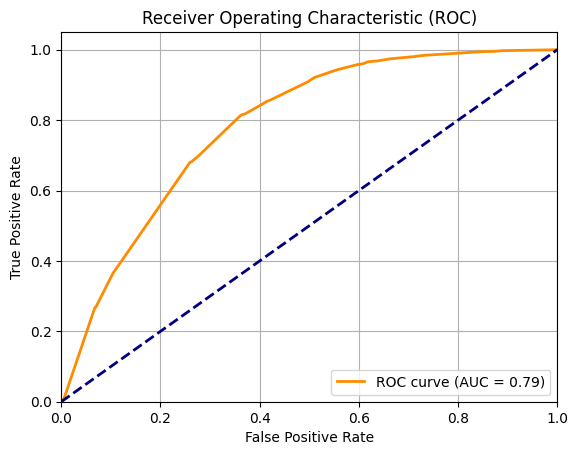

Tree depth 4
min_samples_leaf 3
goal                             0.296525
category_grouped_Web             0.178541
canceled                         0.139085
create_to_launch_days            0.121244
category_grouped_Software        0.105910
launched_at_yr                   0.050648
disable_communication            0.022036
launched_at_hr                   0.019684
category_grouped_Hardware        0.010030
help                             0.007918
static_usd_rate                  0.007387
launched_at_day                  0.006864
launch_to_deadline_days          0.006012
created_at_month                 0.004515
deadline_day                     0.004453
new                              0.004209
created_at_hr                    0.003013
name_len_clean                   0.003012
deadline_weekday_Saturday        0.002195
created_at_day                   0.001868
app                              0.001762
created_at_weekday_Tuesday       0.000884
country_grouped_US               0.000796
cr

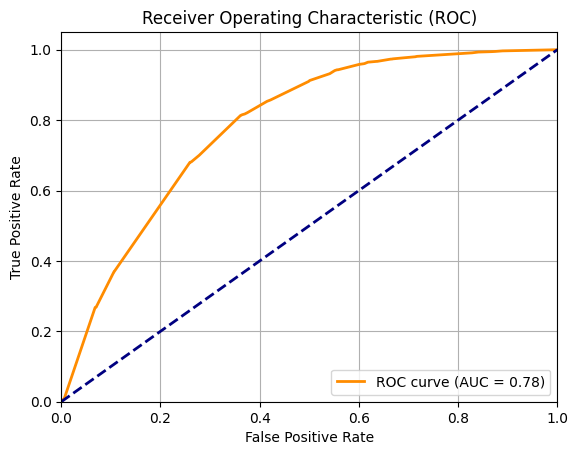

Tree depth 4
min_samples_leaf 4
goal                            0.297392
category_grouped_Web            0.178335
canceled                        0.138924
create_to_launch_days           0.119529
category_grouped_Software       0.105788
launched_at_yr                  0.049375
disable_communication           0.022011
launched_at_hr                  0.018264
category_grouped_Hardware       0.010019
launch_to_deadline_days         0.009576
help                            0.007909
static_usd_rate                 0.006629
launched_at_day                 0.005177
created_at_hr                   0.004889
new                             0.004204
deadline_weekday_Saturday       0.003393
created_at_month                0.003285
name_len_clean                  0.003250
deadline_day                    0.002172
created_at_day                  0.001866
deadline_hr                     0.001865
app                             0.001760
launched_at_weekday_Sunday      0.001179
deadline_month           

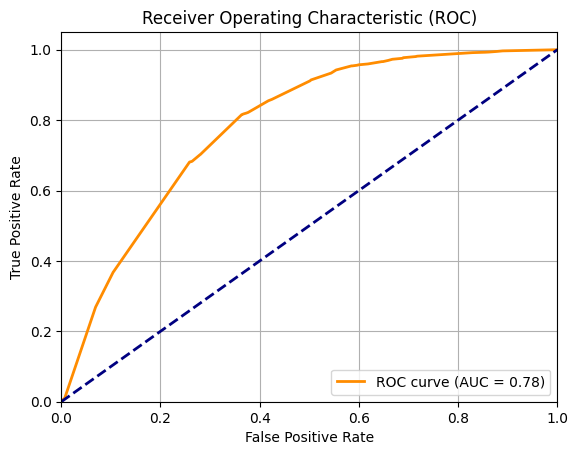

Tree depth 4
min_samples_leaf 5
goal                            0.299483
category_grouped_Web            0.179124
canceled                        0.139539
create_to_launch_days           0.121543
category_grouped_Software       0.106256
launched_at_yr                  0.051183
disable_communication           0.022108
launched_at_hr                  0.018345
category_grouped_Hardware       0.010063
launch_to_deadline_days         0.008077
help                            0.007500
created_at_hr                   0.006638
static_usd_rate                 0.006590
created_at_day                  0.003521
name_len_clean                  0.003264
new                             0.003184
created_at_month                0.002727
deadline_day                    0.002351
launched_at_day                 0.001995
deadline_weekday_Saturday       0.001206
launched_at_weekday_Sunday      0.001184
deadline_hr                     0.000896
deadline_month                  0.000814
country_grouped_US       

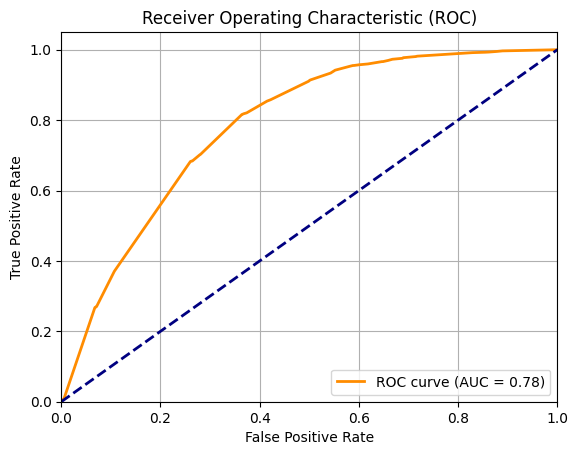

Tree depth 4
min_samples_leaf 6
goal                            0.301719
category_grouped_Web            0.179376
canceled                        0.139735
create_to_launch_days           0.121530
category_grouped_Software       0.106405
launched_at_yr                  0.049664
disable_communication           0.022139
launched_at_hr                  0.018494
category_grouped_Hardware       0.010077
launch_to_deadline_days         0.008088
help                            0.007440
created_at_hr                   0.006999
static_usd_rate                 0.006553
created_at_month                0.004736
name_len_clean                  0.003269
launched_at_day                 0.003027
deadline_day                    0.002185
deadline_weekday_Saturday       0.001207
launched_at_weekday_Sunday      0.001186
new                             0.001013
created_at_day                  0.000953
deadline_hr                     0.000897
DeadlineWeekend                 0.000896
currency_grouped_USD     

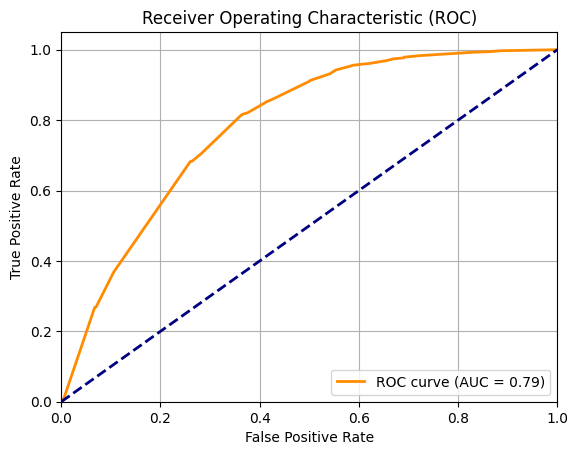

Tree depth 4
min_samples_leaf 7
goal                            0.300443
category_grouped_Web            0.179805
canceled                        0.140069
create_to_launch_days           0.125196
category_grouped_Software       0.106659
launched_at_yr                  0.049782
disable_communication           0.022192
launched_at_hr                  0.018415
category_grouped_Hardware       0.010101
static_usd_rate                 0.007411
help                            0.006682
created_at_hr                   0.005836
launch_to_deadline_days         0.005268
created_at_month                0.004747
name_len_clean                  0.003466
deadline_day                    0.003355
launched_at_day                 0.002579
deadline_hr                     0.001882
launched_at_weekday_Sunday      0.001189
blurb_len_clean                 0.001112
new                             0.001016
DeadlineWeekend                 0.000898
currency_grouped_USD            0.000748
created_at_weekday_Tuesda

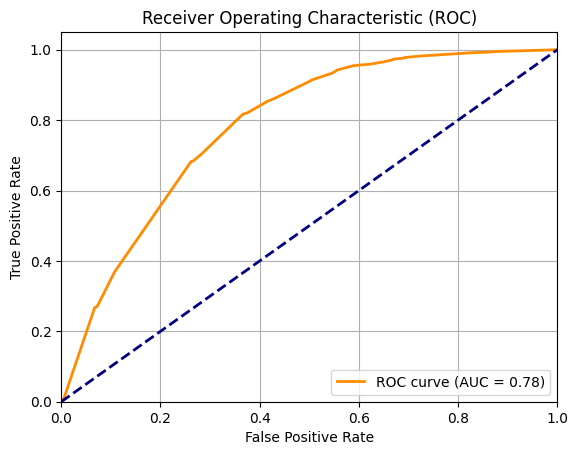

Tree depth 4
min_samples_leaf 8
goal                            0.300846
category_grouped_Web            0.181007
canceled                        0.141006
create_to_launch_days           0.127229
category_grouped_Software       0.107373
launched_at_yr                  0.050115
disable_communication           0.022341
launched_at_hr                  0.018538
category_grouped_Hardware       0.010169
static_usd_rate                 0.007461
help                            0.006152
launch_to_deadline_days         0.005303
name_len_clean                  0.003489
launched_at_day                 0.003480
blurb_len_clean                 0.003043
created_at_month                0.002755
deadline_day                    0.002323
created_at_hr                   0.002198
deadline_hr                     0.001894
new                             0.001022
currency_grouped_USD            0.000753
created_at_weekday_Tuesday      0.000541
created_at_day                  0.000346
created_at_weekday_Monday

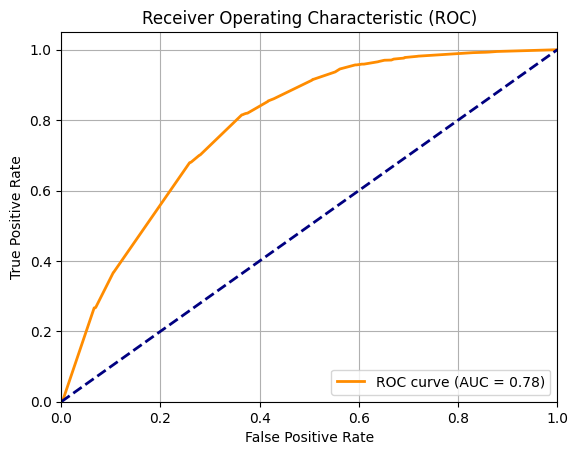

Tree depth 4
min_samples_leaf 9
goal                            0.300788
category_grouped_Web            0.181156
canceled                        0.141122
create_to_launch_days           0.127256
category_grouped_Software       0.107461
launched_at_yr                  0.050156
disable_communication           0.022359
launched_at_hr                  0.016369
category_grouped_Hardware       0.010177
static_usd_rate                 0.007467
launch_to_deadline_days         0.005308
name_len_clean                  0.003492
help                            0.003338
blurb_len_clean                 0.003045
created_at_month                0.002758
launched_at_day                 0.002728
deadline_day                    0.002515
created_at_hr                   0.002199
app                             0.002154
deadline_hr                     0.001896
launched_at_month               0.001761
DeadlineWeekend                 0.001733
new                             0.000855
country_grouped_US       

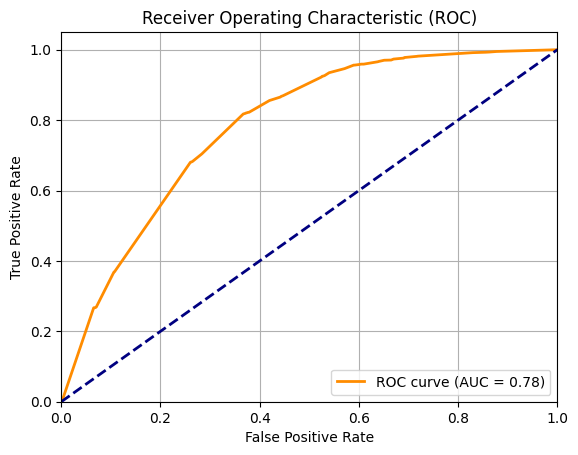

Tree depth 4
min_samples_leaf 10
goal                            0.301896
category_grouped_Web            0.181986
canceled                        0.141768
create_to_launch_days           0.125442
category_grouped_Software       0.107954
launched_at_yr                  0.050386
disable_communication           0.022461
launched_at_hr                  0.016345
category_grouped_Hardware       0.011760
static_usd_rate                 0.007501
launch_to_deadline_days         0.005332
name_len_clean                  0.003508
help                            0.003353
created_at_month                0.002770
app                             0.002541
deadline_day                    0.002217
created_at_hr                   0.002210
deadline_hr                     0.001923
launched_at_month               0.001769
DeadlineWeekend                 0.001741
launched_at_day                 0.001650
blurb_len_clean                 0.001125
country_grouped_US              0.000757
new                     

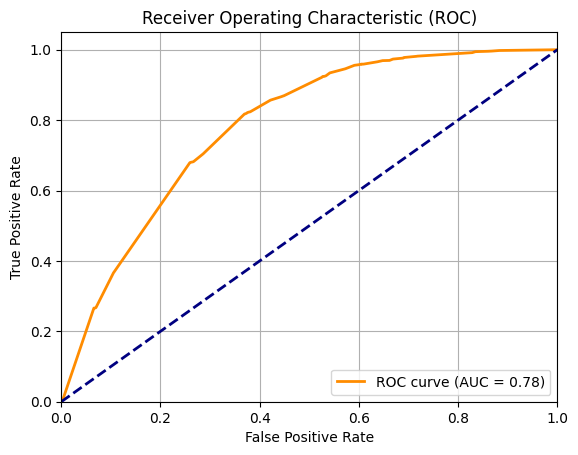

Tree depth 4
min_samples_leaf 11
goal                            0.302171
category_grouped_Web            0.182203
canceled                        0.141937
create_to_launch_days           0.125480
category_grouped_Software       0.108082
launched_at_yr                  0.050917
disable_communication           0.022488
launched_at_hr                  0.016365
category_grouped_Hardware       0.011774
static_usd_rate                 0.007510
launch_to_deadline_days         0.005338
name_len_clean                  0.003512
help                            0.003357
created_at_month                0.002774
created_at_hr                   0.002671
deadline_day                    0.002219
launched_at_day                 0.002173
app                             0.002166
blurb_len_clean                 0.002064
deadline_hr                     0.001926
launched_at_month               0.001771
country_grouped_US              0.000758
deadline_weekday_Tuesday        0.000208
created_at_weekday_Wedne

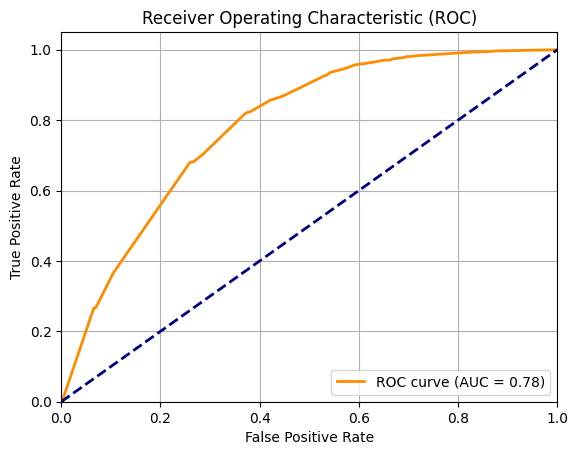

Tree depth 4
min_samples_leaf 12
goal                            0.302232
category_grouped_Web            0.182239
canceled                        0.141966
create_to_launch_days           0.125463
category_grouped_Software       0.108104
launched_at_yr                  0.050927
disable_communication           0.022493
launched_at_hr                  0.016368
category_grouped_Hardware       0.011776
static_usd_rate                 0.007511
launch_to_deadline_days         0.005339
name_len_clean                  0.003513
created_at_hr                   0.003216
created_at_month                0.002774
deadline_hr                     0.002683
help                            0.002546
deadline_day                    0.002220
app                             0.002166
launched_at_day                 0.002163
launched_at_month               0.001772
blurb_len_clean                 0.001428
country_grouped_US              0.000758
deadline_weekday_Tuesday        0.000208
created_at_weekday_Wedne

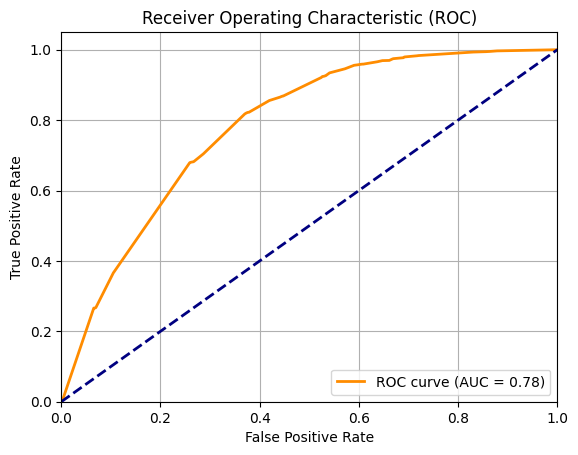

Tree depth 4
min_samples_leaf 13
goal                            0.302510
category_grouped_Web            0.182407
canceled                        0.142096
create_to_launch_days           0.124850
category_grouped_Software       0.108203
launched_at_yr                  0.050974
disable_communication           0.022513
launched_at_hr                  0.016383
category_grouped_Hardware       0.011787
static_usd_rate                 0.007518
launch_to_deadline_days         0.005344
name_len_clean                  0.003930
created_at_month                0.002777
deadline_hr                     0.002685
created_at_hr                   0.002674
help                            0.002548
deadline_day                    0.002222
app                             0.002168
launched_at_day                 0.002104
launched_at_month               0.001773
blurb_len_clean                 0.001429
currency_grouped_USD            0.000759
deadline_weekday_Tuesday        0.000209
created_at_weekday_Wedne

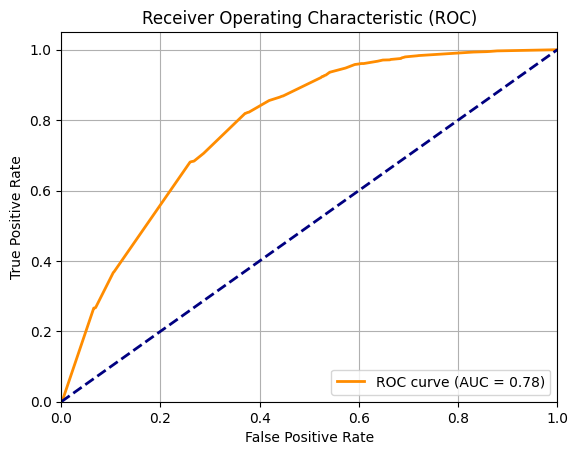

Tree depth 4
min_samples_leaf 14
goal                            0.302522
category_grouped_Web            0.182414
canceled                        0.142102
create_to_launch_days           0.124528
category_grouped_Software       0.108208
launched_at_yr                  0.050976
disable_communication           0.022514
launched_at_hr                  0.016384
category_grouped_Hardware       0.011788
static_usd_rate                 0.007519
launch_to_deadline_days         0.005344
name_len_clean                  0.003930
deadline_hr                     0.002987
created_at_month                0.002777
created_at_hr                   0.002575
help                            0.002548
deadline_day                    0.002306
app                             0.002169
launched_at_day                 0.002104
launched_at_month               0.001773
blurb_len_clean                 0.001429
currency_grouped_USD            0.000759
deadline_weekday_Tuesday        0.000209
created_at_weekday_Wedne

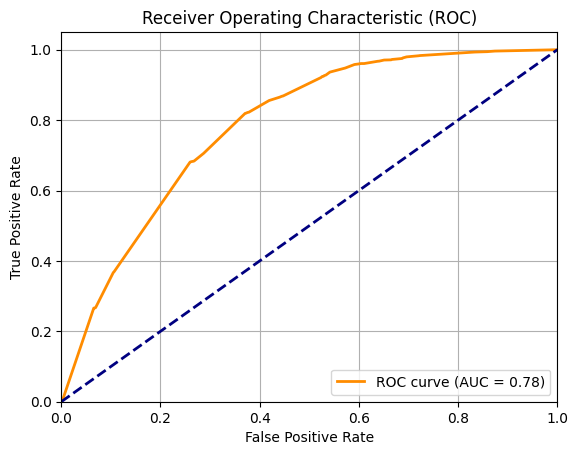

Tree depth 4
min_samples_leaf 2
goal                            0.272181
category_grouped_Web            0.162947
canceled                        0.126937
create_to_launch_days           0.117692
category_grouped_Software       0.096660
launched_at_yr                  0.051250
name_len_clean                  0.022671
launch_to_deadline_days         0.021860
launched_at_hr                  0.020368
disable_communication           0.020112
category_grouped_Hardware       0.009154
launched_at_weekday_Tuesday     0.008570
created_at_hr                   0.007944
static_usd_rate                 0.007781
help                            0.007227
created_at_day                  0.006743
launched_at_day                 0.005684
deadline_month                  0.004883
deadline_day                    0.004591
new                             0.004235
created_at_month                0.004121
deadline_hr                     0.003061
DeadlineWeekend                 0.002034
category_grouped_Musical 

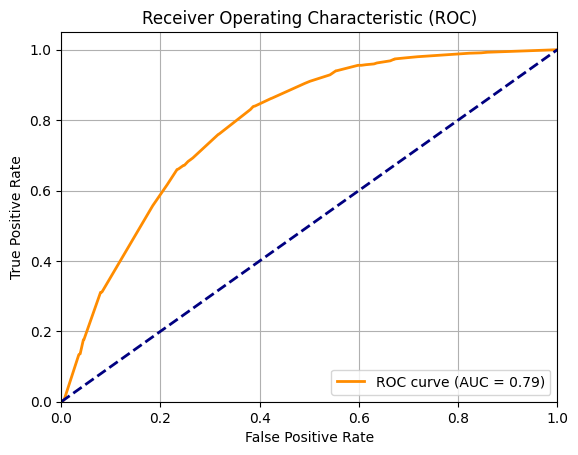

Tree depth 4
min_samples_leaf 3
goal                            0.271885
category_grouped_Web            0.163484
canceled                        0.127355
create_to_launch_days           0.118170
category_grouped_Software       0.096978
launched_at_yr                  0.051757
name_len_clean                  0.023535
launched_at_hr                  0.020875
launch_to_deadline_days         0.020731
disable_communication           0.020178
category_grouped_Hardware       0.009185
launched_at_weekday_Tuesday     0.008599
deadline_month                  0.007767
static_usd_rate                 0.007526
help                            0.007250
launched_at_day                 0.007058
created_at_hr                   0.004643
created_at_day                  0.004299
new                             0.004249
created_at_month                0.004135
deadline_day                    0.004077
DeadlineWeekend                 0.002040
deadline_weekday_Saturday       0.002010
blurb_len_clean          

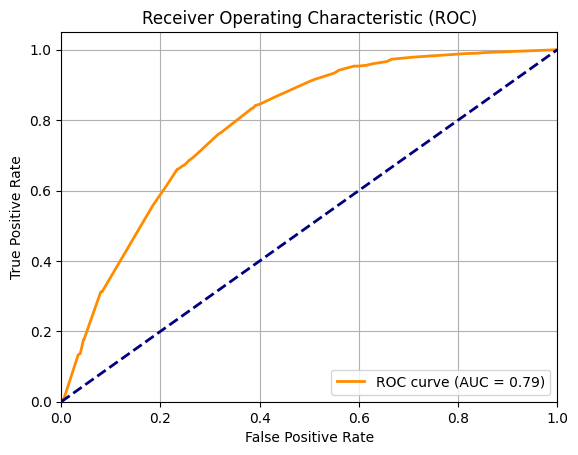

Tree depth 4
min_samples_leaf 4
goal                            0.271633
category_grouped_Web            0.162540
canceled                        0.126620
create_to_launch_days           0.119670
category_grouped_Software       0.096418
launched_at_yr                  0.050002
name_len_clean                  0.022671
launch_to_deadline_days         0.020812
disable_communication           0.020061
launched_at_hr                  0.019416
category_grouped_Hardware       0.009131
LaunchedTuesday                 0.008549
deadline_month                  0.007533
help                            0.007209
launched_at_day                 0.007024
DeadlineWeekend                 0.006840
static_usd_rate                 0.006188
deadline_hr                     0.005836
created_at_hr                   0.004456
created_at_day                  0.004274
new                             0.004224
deadline_weekday_Saturday       0.003092
created_at_month                0.002994
deadline_day             

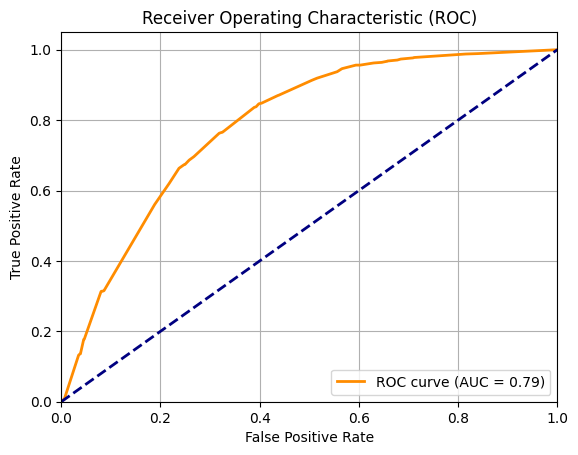

Tree depth 4
min_samples_leaf 5
goal                            0.275081
category_grouped_Web            0.164086
canceled                        0.127824
create_to_launch_days           0.120508
category_grouped_Software       0.097335
launched_at_yr                  0.051934
name_len_clean                  0.022887
launch_to_deadline_days         0.020312
disable_communication           0.020252
launched_at_hr                  0.019206
category_grouped_Hardware       0.009218
deadline_month                  0.009217
launched_at_weekday_Tuesday     0.008630
help                            0.006870
static_usd_rate                 0.006184
created_at_hr                   0.005866
DeadlineWeekend                 0.005466
created_at_day                  0.004315
deadline_hr                     0.003740
launched_at_day                 0.003284
created_at_month                0.002498
blurb_len_clean                 0.002254
deadline_day                    0.002180
launched_at_weekday_Satur

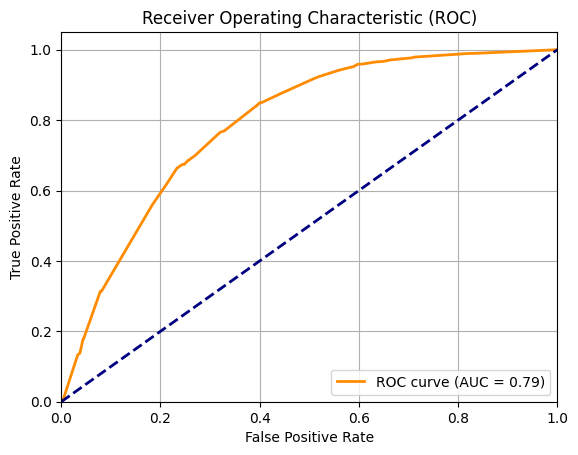

Tree depth 4
min_samples_leaf 6
goal                            0.278393
category_grouped_Web            0.165157
canceled                        0.128659
create_to_launch_days           0.117641
category_grouped_Software       0.097971
launched_at_yr                  0.051395
name_len_clean                  0.023150
launched_at_hr                  0.021706
disable_communication           0.020384
launch_to_deadline_days         0.018400
category_grouped_Hardware       0.009279
launched_at_weekday_Tuesday     0.008687
deadline_month                  0.007782
created_at_hr                   0.007020
help                            0.007014
DeadlineWeekend                 0.006326
static_usd_rate                 0.006182
created_at_month                0.004360
launched_at_day                 0.002408
blurb_len_clean                 0.002269
deadline_day                    0.002165
deadline_hr                     0.002055
launched_at_weekday_Saturday    0.001671
launched_at_month        

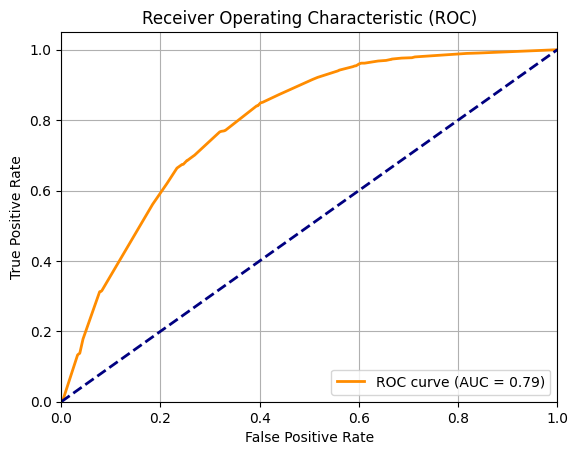

Tree depth 4
min_samples_leaf 7
goal                            0.278871
category_grouped_Web            0.165233
canceled                        0.128718
create_to_launch_days           0.118210
category_grouped_Software       0.098016
launched_at_yr                  0.053792
name_len_clean                  0.023335
disable_communication           0.020394
launched_at_hr                  0.018470
launch_to_deadline_days         0.016321
category_grouped_Hardware       0.009283
launched_at_weekday_Tuesday     0.008691
deadline_month                  0.006907
static_usd_rate                 0.006810
DeadlineWeekend                 0.006329
help                            0.006140
created_at_hr                   0.005493
launched_at_month               0.005086
deadline_hr                     0.003558
created_at_month                0.003147
launched_at_day                 0.003123
deadline_day                    0.002953
blurb_len_clean                 0.002886
created_at_day           

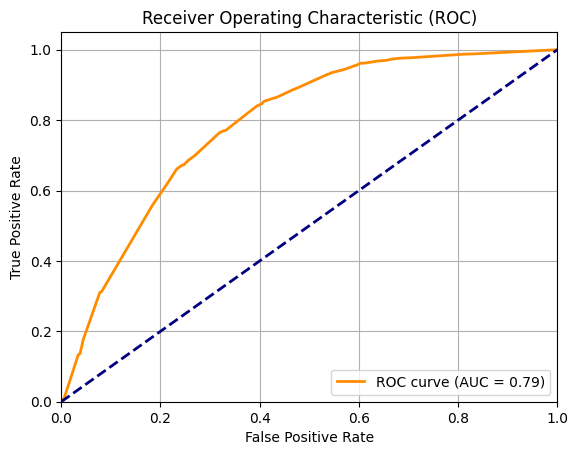

Tree depth 4
min_samples_leaf 8
goal                            0.278196
category_grouped_Web            0.166264
canceled                        0.129521
create_to_launch_days           0.120932
category_grouped_Software       0.098627
launched_at_yr                  0.054128
name_len_clean                  0.023366
disable_communication           0.020521
launched_at_hr                  0.017926
launch_to_deadline_days         0.016347
category_grouped_Hardware       0.009341
LaunchedTuesday                 0.008745
deadline_month                  0.006950
static_usd_rate                 0.006853
help                            0.005651
DeadlineWeekend                 0.005538
launched_at_day                 0.004571
deadline_hr                     0.004307
blurb_len_clean                 0.004211
launched_at_month               0.003186
created_at_month                0.002531
deadline_day                    0.002444
created_at_hr                   0.002387
created_at_day           

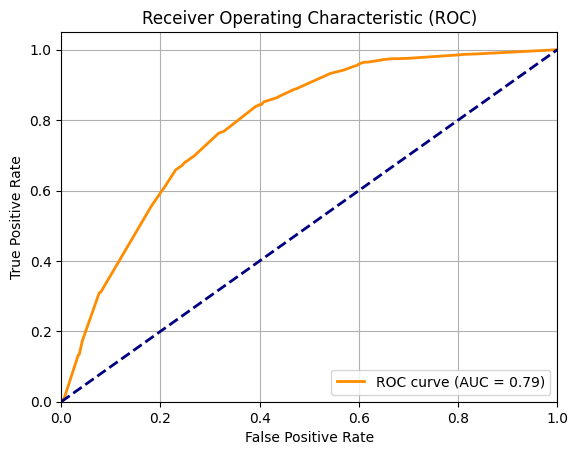

Tree depth 4
min_samples_leaf 9
goal                            0.281379
category_grouped_Web            0.166116
canceled                        0.129406
create_to_launch_days           0.119869
category_grouped_Software       0.098540
launched_at_yr                  0.054080
name_len_clean                  0.023722
disable_communication           0.020503
launched_at_hr                  0.017281
launch_to_deadline_days         0.016028
category_grouped_Hardware       0.009332
launched_at_weekday_Tuesday     0.008737
deadline_month                  0.006944
static_usd_rate                 0.006847
blurb_len_clean                 0.005576
DeadlineWeekend                 0.005049
launched_at_day                 0.004283
deadline_hr                     0.004191
created_at_month                0.003723
launched_at_month               0.003097
help                            0.003060
deadline_day                    0.002604
created_at_hr                   0.002017
app                      

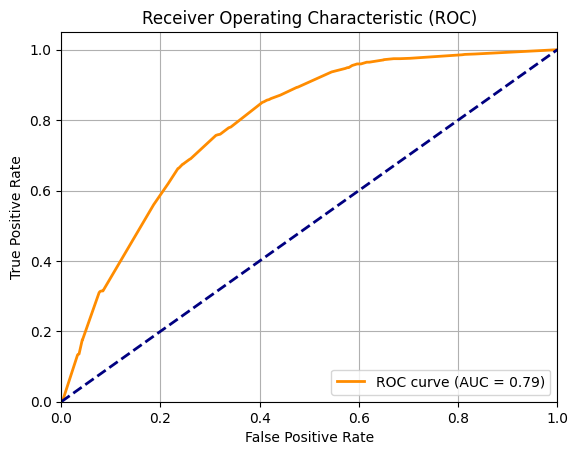

Tree depth 4
min_samples_leaf 10
goal                            0.283526
category_grouped_Web            0.167803
canceled                        0.130720
create_to_launch_days           0.121298
category_grouped_Software       0.099540
launched_at_yr                  0.052218
name_len_clean                  0.023697
disable_communication           0.020711
launched_at_hr                  0.018279
launch_to_deadline_days         0.016925
category_grouped_Hardware       0.010844
LaunchedTuesday                 0.008826
deadline_month                  0.007015
static_usd_rate                 0.006916
deadline_hr                     0.004750
created_at_month                0.003119
help                            0.003092
launched_at_day                 0.002909
blurb_len_clean                 0.002467
created_at_hr                   0.002431
app                             0.002343
deadline_day                    0.002260
launched_at_month               0.001631
DeadlineWeekend         

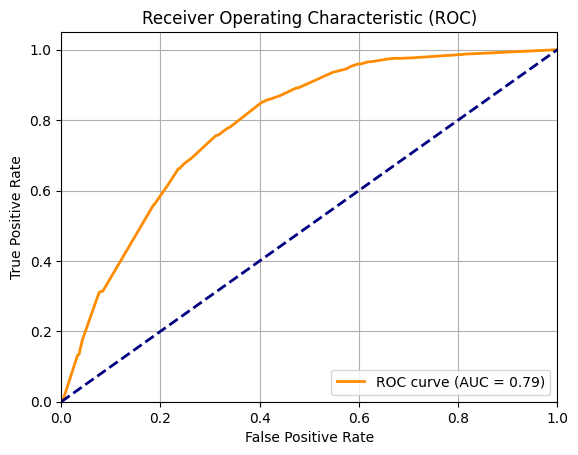

Tree depth 4
min_samples_leaf 11
goal                            0.283730
category_grouped_Web            0.168101
canceled                        0.130952
create_to_launch_days           0.121688
category_grouped_Software       0.099717
launched_at_yr                  0.052745
name_len_clean                  0.023624
disable_communication           0.020748
launched_at_hr                  0.018361
launch_to_deadline_days         0.016955
category_grouped_Hardware       0.010863
LaunchedTuesday                 0.008842
deadline_month                  0.007027
static_usd_rate                 0.006929
deadline_hr                     0.004463
blurb_len_clean                 0.003415
launched_at_day                 0.003329
created_at_month                0.003124
help                            0.003097
created_at_hr                   0.002464
deadline_day                    0.002379
app                             0.001998
launched_at_month               0.001634
created_at_day          

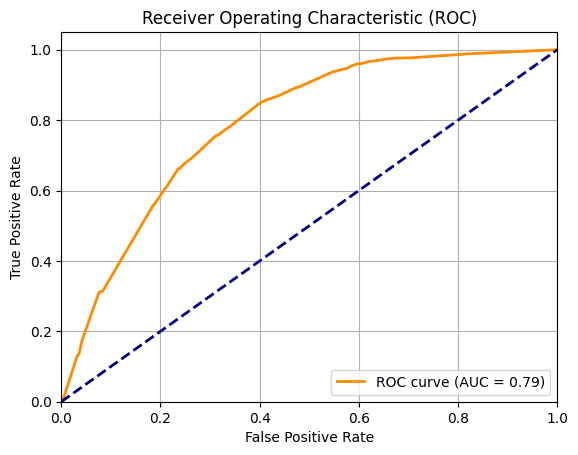

Tree depth 4
min_samples_leaf 12
goal                            0.284113
category_grouped_Web            0.168372
canceled                        0.131163
create_to_launch_days           0.121700
category_grouped_Software       0.099878
launched_at_yr                  0.052232
name_len_clean                  0.024519
disable_communication           0.020781
launched_at_hr                  0.018502
launch_to_deadline_days         0.015612
category_grouped_Hardware       0.010880
launched_at_weekday_Tuesday     0.008856
deadline_month                  0.007038
static_usd_rate                 0.006940
deadline_hr                     0.004684
launched_at_day                 0.003686
created_at_month                0.003129
created_at_hr                   0.002971
blurb_len_clean                 0.002832
deadline_day                    0.002383
help                            0.002352
app                             0.002002
launched_at_month               0.001637
created_at_day          

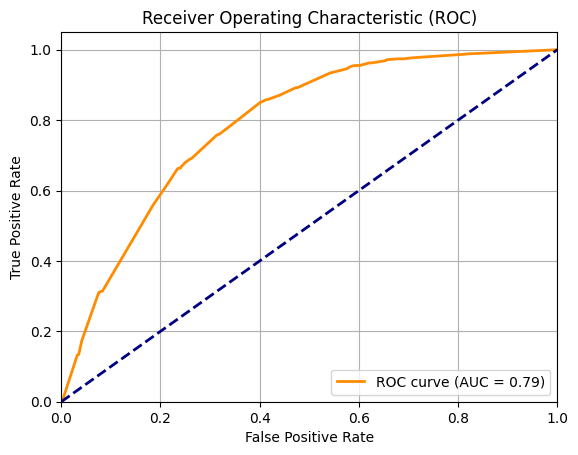

Tree depth 4
min_samples_leaf 13
goal                            0.284590
category_grouped_Web            0.169166
canceled                        0.131782
create_to_launch_days           0.121146
category_grouped_Software       0.100349
launched_at_yr                  0.052478
name_len_clean                  0.025018
disable_communication           0.020879
launched_at_hr                  0.017599
launch_to_deadline_days         0.015644
category_grouped_Hardware       0.010932
launched_at_weekday_Tuesday     0.008898
deadline_month                  0.007072
static_usd_rate                 0.006972
deadline_hr                     0.005458
blurb_len_clean                 0.003057
launched_at_day                 0.002630
created_at_month                0.002575
created_at_hr                   0.002480
app                             0.002441
help                            0.002363
deadline_day                    0.002178
launched_at_month               0.001645
currency_grouped_USD    

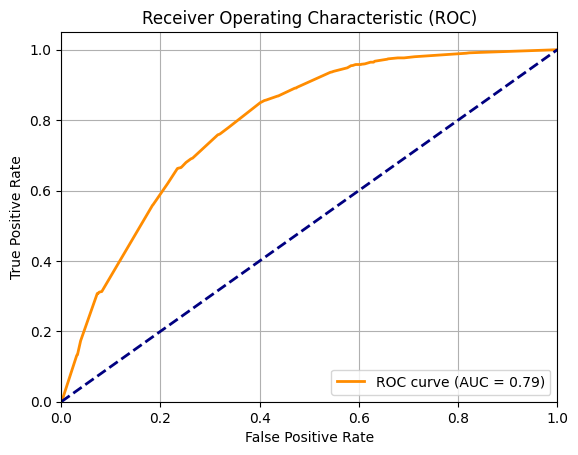

Tree depth 4
min_samples_leaf 14
goal                            0.284615
category_grouped_Web            0.169181
canceled                        0.131793
create_to_launch_days           0.120133
category_grouped_Software       0.100358
launched_at_yr                  0.052483
name_len_clean                  0.025020
disable_communication           0.020881
launched_at_hr                  0.017600
launch_to_deadline_days         0.015549
category_grouped_Hardware       0.010933
launched_at_weekday_Tuesday     0.008898
deadline_month                  0.007072
static_usd_rate                 0.006973
deadline_hr                     0.004996
blurb_len_clean                 0.003265
deadline_day                    0.003186
launched_at_day                 0.002630
created_at_month                0.002575
app                             0.002442
created_at_hr                   0.002388
help                            0.002363
launched_at_month               0.001645
created_at_day          

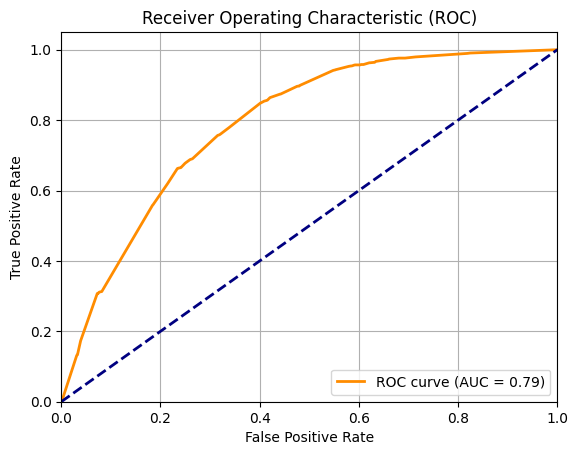

Tree depth 4
min_samples_leaf 2
goal                            0.257208
category_grouped_Web            0.146506
canceled                        0.114129
create_to_launch_days           0.109707
category_grouped_Software       0.086907
launched_at_yr                  0.057007
disable_communication           0.026602
launch_to_deadline_days         0.025669
name_len_clean                  0.023549
launched_at_hr                  0.021776
category_grouped_Hardware       0.013099
created_at_day                  0.012610
launched_at_day                 0.009710
deadline_hr                     0.009412
static_usd_rate                 0.008601
deadline_month                  0.008120
LaunchedTuesday                 0.007706
deadline_day                    0.007390
help                            0.007290
category_grouped_Plays          0.005436
created_at_hr                   0.005296
DeadlineWeekend                 0.004880
created_at_month                0.004708
category_grouped_Musical 

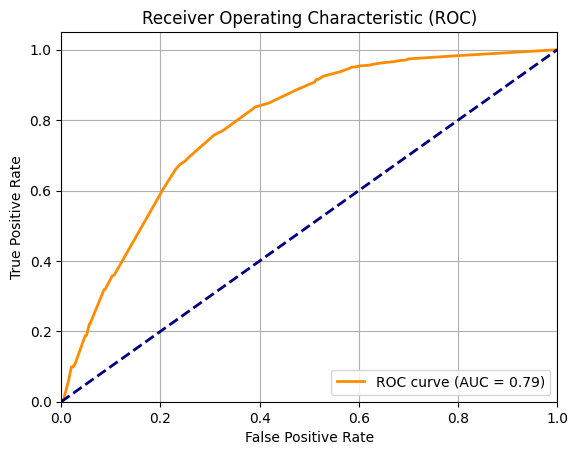

Tree depth 4
min_samples_leaf 3
goal                            0.259132
category_grouped_Web            0.147303
canceled                        0.114750
create_to_launch_days           0.108845
category_grouped_Software       0.087380
launched_at_yr                  0.057305
disable_communication           0.026746
launch_to_deadline_days         0.025268
launched_at_hr                  0.021795
name_len_clean                  0.020663
category_grouped_Hardware       0.014392
launched_at_day                 0.010407
deadline_hr                     0.009829
created_at_day                  0.008961
LaunchedTuesday                 0.007748
help                            0.007564
static_usd_rate                 0.007437
blurb_len_clean                 0.007103
deadline_month                  0.006998
deadline_day                    0.006505
category_grouped_Plays          0.005465
created_at_month                0.005114
DeadlineWeekend                 0.004907
new                      

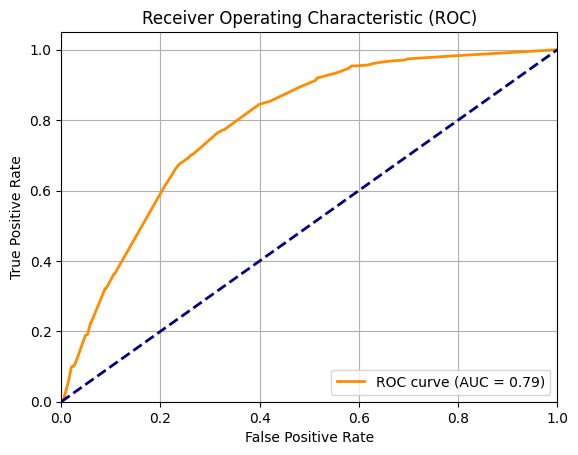

Tree depth 4
min_samples_leaf 4
goal                            0.263032
category_grouped_Web            0.147753
canceled                        0.115101
create_to_launch_days           0.110699
category_grouped_Software       0.087647
launched_at_yr                  0.056474
disable_communication           0.026828
launch_to_deadline_days         0.025702
launched_at_hr                  0.022408
name_len_clean                  0.020609
category_grouped_Hardware       0.014436
deadline_hr                     0.009405
created_at_day                  0.009234
deadline_day                    0.008097
LaunchedTuesday                 0.007771
launched_at_day                 0.007395
help                            0.007352
deadline_month                  0.006848
DeadlineWeekend                 0.006218
static_usd_rate                 0.005625
category_grouped_Plays          0.005482
created_at_month                0.004411
blurb_len_clean                 0.004338
created_at_hr            

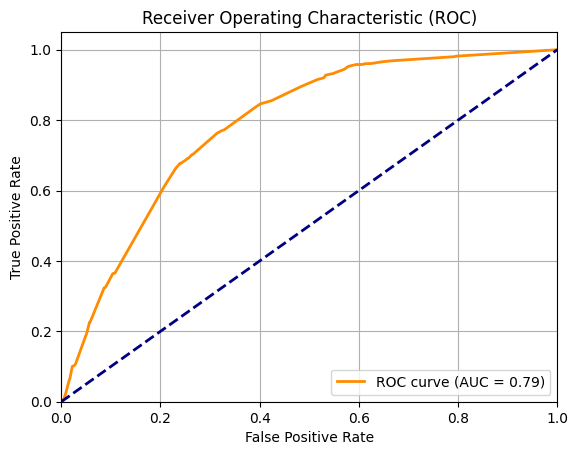

Tree depth 4
min_samples_leaf 5
goal                            0.265399
category_grouped_Web            0.149547
canceled                        0.116498
create_to_launch_days           0.112351
category_grouped_Software       0.088710
launched_at_yr                  0.056800
disable_communication           0.027154
launch_to_deadline_days         0.023892
name_len_clean                  0.020859
launched_at_hr                  0.020642
category_grouped_Hardware       0.013371
created_at_day                  0.010772
deadline_hr                     0.009654
deadline_month                  0.008400
LaunchedTuesday                 0.007866
deadline_day                    0.007046
static_usd_rate                 0.006666
help                            0.006262
category_grouped_Plays          0.005548
created_at_hr                   0.005346
DeadlineWeekend                 0.004981
launched_at_month               0.004720
blurb_len_clean                 0.004615
created_at_month         

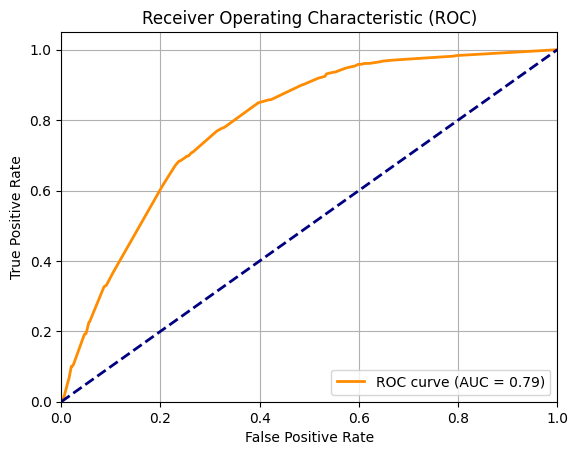

Tree depth 4
min_samples_leaf 6
goal                            0.267754
category_grouped_Web            0.151122
canceled                        0.117725
create_to_launch_days           0.110348
category_grouped_Software       0.089645
launched_at_yr                  0.056594
disable_communication           0.027440
name_len_clean                  0.023636
launched_at_hr                  0.022785
launch_to_deadline_days         0.022055
category_grouped_Hardware       0.013512
deadline_hr                     0.011629
launched_at_weekday_Tuesday     0.007949
deadline_day                    0.007493
DeadlineWeekend                 0.007332
deadline_month                  0.007120
launched_at_month               0.007070
created_at_hr                   0.006424
help                            0.006268
static_usd_rate                 0.005753
category_grouped_Plays          0.005607
blurb_len_clean                 0.004194
created_at_month                0.002824
created_at_day           

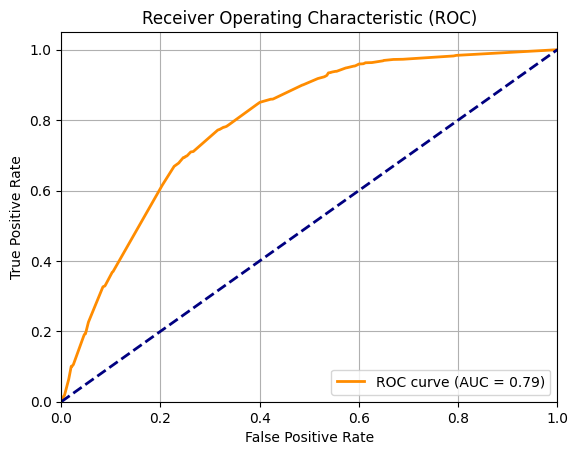

Tree depth 4
min_samples_leaf 7
goal                            0.271025
category_grouped_Web            0.151382
canceled                        0.117927
create_to_launch_days           0.113357
category_grouped_Software       0.089799
launched_at_yr                  0.058375
disable_communication           0.027487
launched_at_hr                  0.022804
name_len_clean                  0.021379
launch_to_deadline_days         0.020284
category_grouped_Hardware       0.013535
deadline_hr                     0.010394
launched_at_weekday_Tuesday     0.007962
deadline_day                    0.007648
DeadlineWeekend                 0.007345
deadline_month                  0.006328
created_at_month                0.006304
static_usd_rate                 0.006239
help                            0.005626
category_grouped_Plays          0.005616
created_at_hr                   0.004914
blurb_len_clean                 0.004738
launched_at_month               0.004061
launched_at_day          

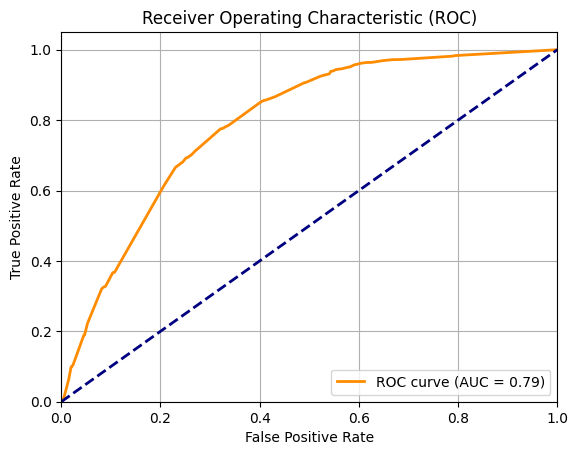

Tree depth 4
min_samples_leaf 8
goal                            0.269587
category_grouped_Web            0.152277
canceled                        0.118624
create_to_launch_days           0.114325
category_grouped_Software       0.090330
launched_at_yr                  0.058720
disable_communication           0.027649
launched_at_hr                  0.023245
name_len_clean                  0.021505
launch_to_deadline_days         0.020057
category_grouped_Hardware       0.013615
deadline_hr                     0.009560
static_usd_rate                 0.008110
launched_at_weekday_Tuesday     0.008009
deadline_day                    0.006926
DeadlineWeekend                 0.006628
deadline_month                  0.006366
category_grouped_Plays          0.005650
blurb_len_clean                 0.005304
help                            0.005176
launched_at_day                 0.005016
created_at_month                0.004858
launched_at_month               0.003464
created_at_hr            

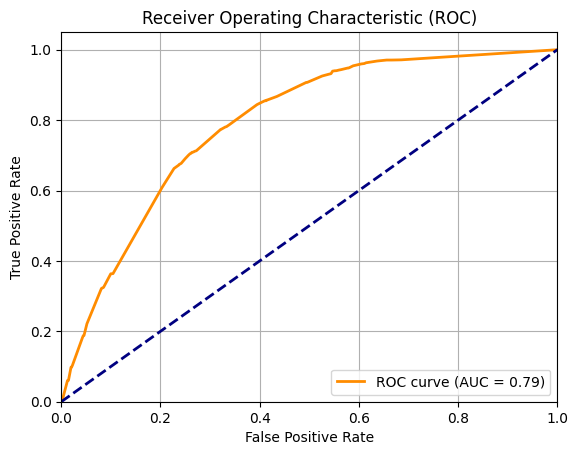

Tree depth 4
min_samples_leaf 9
goal                            0.269260
category_grouped_Web            0.151802
canceled                        0.118255
create_to_launch_days           0.116605
category_grouped_Software       0.090049
launched_at_yr                  0.057697
disable_communication           0.027563
name_len_clean                  0.021334
launch_to_deadline_days         0.019742
launched_at_hr                  0.018085
deadline_hr                     0.015504
category_grouped_Hardware       0.013573
static_usd_rate                 0.008084
LaunchedTuesday                 0.007984
deadline_day                    0.007328
deadline_month                  0.006998
blurb_len_clean                 0.006228
DeadlineWeekend                 0.006165
launched_at_day                 0.006085
category_grouped_Plays          0.005632
launched_at_month               0.005052
created_at_month                0.003402
help                            0.002797
category_grouped_Musical 

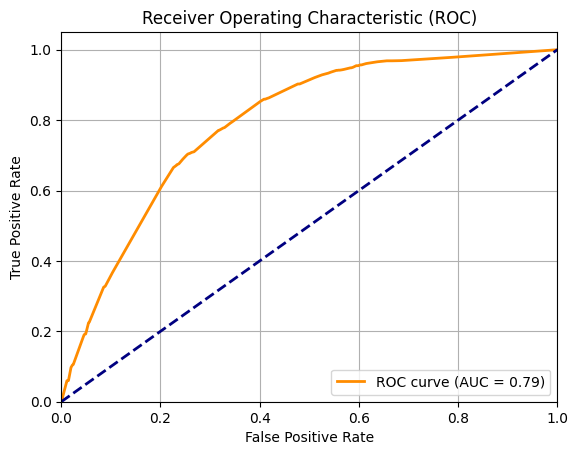

Tree depth 4
min_samples_leaf 10
goal                            0.272552
category_grouped_Web            0.153827
canceled                        0.119832
create_to_launch_days           0.117689
category_grouped_Software       0.091250
launched_at_yr                  0.056257
disable_communication           0.027931
name_len_clean                  0.021618
launch_to_deadline_days         0.020678
launched_at_hr                  0.019608
category_grouped_Hardware       0.015052
deadline_hr                     0.014233
static_usd_rate                 0.008192
LaunchedTuesday                 0.008091
deadline_day                    0.007094
deadline_month                  0.006495
category_grouped_Plays          0.005707
blurb_len_clean                 0.004548
created_at_month                0.003964
launched_at_day                 0.003837
DeadlineWeekend                 0.003043
help                            0.002834
launched_at_month               0.002701
category_grouped_Musical

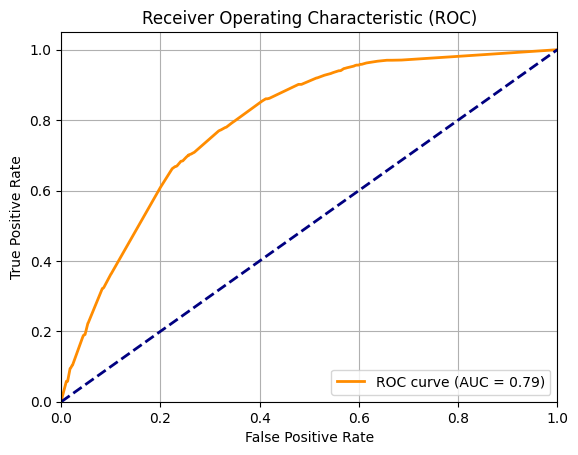

Tree depth 4
min_samples_leaf 11
goal                            0.274801
category_grouped_Web            0.154598
canceled                        0.120432
create_to_launch_days           0.115594
category_grouped_Software       0.091707
launched_at_yr                  0.056938
disable_communication           0.028071
name_len_clean                  0.021726
launched_at_hr                  0.020764
launch_to_deadline_days         0.020350
deadline_hr                     0.016157
category_grouped_Hardware       0.015128
launched_at_weekday_Tuesday     0.008131
deadline_day                    0.007236
deadline_month                  0.006516
static_usd_rate                 0.006372
category_grouped_Plays          0.005736
blurb_len_clean                 0.005175
launched_at_day                 0.004238
created_at_month                0.002873
help                            0.002848
category_grouped_Musical        0.002272
created_at_hr                   0.002266
app                     

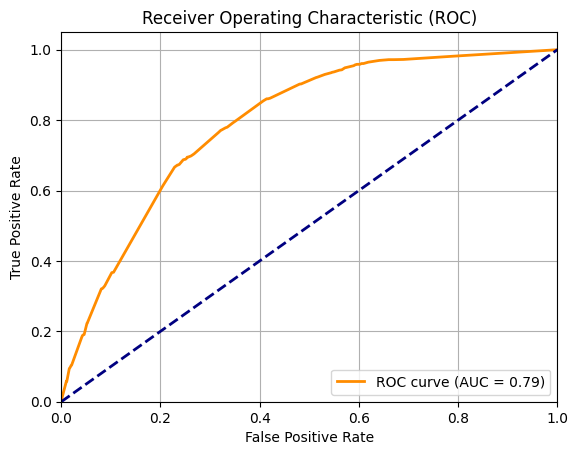

Tree depth 4
min_samples_leaf 12
goal                            0.275409
category_grouped_Web            0.155635
canceled                        0.121241
create_to_launch_days           0.115471
category_grouped_Software       0.092322
launched_at_yr                  0.056767
disable_communication           0.028259
name_len_clean                  0.022664
launched_at_hr                  0.019838
launch_to_deadline_days         0.019655
deadline_hr                     0.016406
category_grouped_Hardware       0.015229
LaunchedTuesday                 0.008186
deadline_month                  0.006506
static_usd_rate                 0.006415
category_grouped_Plays          0.005774
deadline_day                    0.005733
blurb_len_clean                 0.004532
launched_at_day                 0.004526
created_at_month                0.002892
created_at_hr                   0.002747
launched_at_month               0.002294
category_grouped_Musical        0.002288
help                    

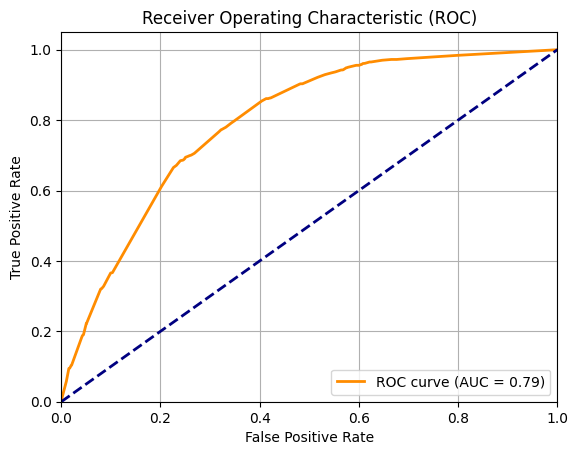

Tree depth 4
min_samples_leaf 13
goal                            0.276802
category_grouped_Web            0.156264
canceled                        0.121731
create_to_launch_days           0.113101
category_grouped_Software       0.092695
launched_at_yr                  0.056996
disable_communication           0.028373
name_len_clean                  0.023110
launch_to_deadline_days         0.019633
launched_at_hr                  0.018835
deadline_hr                     0.016473
category_grouped_Hardware       0.015291
launched_at_weekday_Tuesday     0.008219
deadline_month                  0.006532
static_usd_rate                 0.006441
category_grouped_Plays          0.005798
deadline_day                    0.005557
created_at_month                0.004813
blurb_len_clean                 0.004662
launched_at_day                 0.003603
category_grouped_Musical        0.002297
created_at_hr                   0.002290
help                            0.002183
launched_at_month       

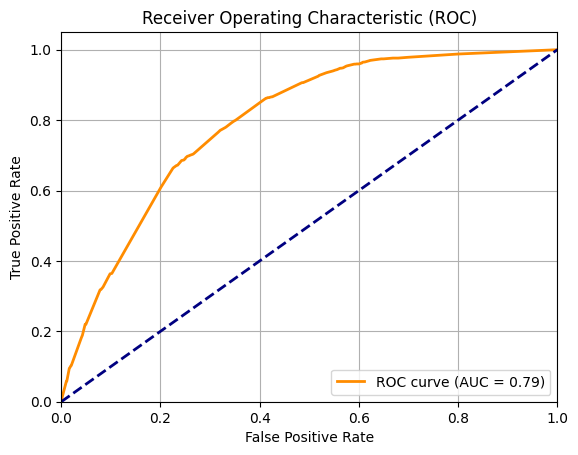

Tree depth 4
min_samples_leaf 14
goal                            0.277293
category_grouped_Web            0.156259
canceled                        0.121727
create_to_launch_days           0.113997
category_grouped_Software       0.092692
launched_at_yr                  0.056994
disable_communication           0.028373
name_len_clean                  0.023109
launch_to_deadline_days         0.019792
launched_at_hr                  0.018616
deadline_hr                     0.016045
category_grouped_Hardware       0.015290
LaunchedTuesday                 0.008219
deadline_month                  0.006532
deadline_day                    0.006487
static_usd_rate                 0.006440
category_grouped_Plays          0.005797
blurb_len_clean                 0.004853
created_at_month                0.004181
launched_at_day                 0.003033
category_grouped_Musical        0.002297
created_at_hr                   0.002206
help                            0.002183
app                     

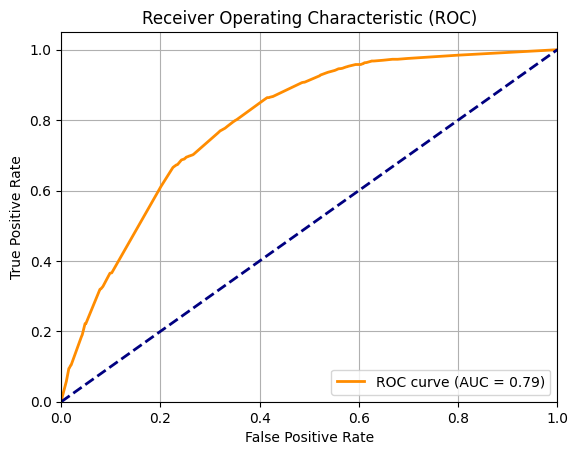

In [67]:
model_score_stats = []

for depth in range(2, 10):
    for min_samples_leaf in range(2, 15):
        print(f"Tree depth {i}")
        print(f"min_samples_leaf {min_samples_leaf}")

        clf = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='gini', min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)

        cv_scores = cross_val_score(clf, X, y, cv=10)

        #examine the feature importance
        importances = clf.feature_importances_
        feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
        filtered_ranks = feature_ranks[feature_ranks > 0]
        print(filtered_ranks)
        #for index, value in zip(feature_ranks.index, feature_ranks.values):
        #    print(index, value)
        #print(feature_ranks)
        #split_feature_index = clf.tree_.feature[0]
        #print("Split on feature:", X.columns[split_feature_index])

        model_score_stats.append({"model": clf, "depth": i, "min_samples_leaf":min_samples_leaf, "mean_score": cv_scores.mean(), "score_std":cv_scores.std()})

        print(f"Cross-validation scores: {cv_scores}")
        print(f"Mean accuracy: {cv_scores.mean():.4f}")
        print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

        y_scores = clf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

        # Compute ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()
            

In [68]:
max_score = max(model_score_stats, key=lambda x: x['mean_score'])
min_std = min(model_score_stats, key=lambda x: x['score_std'])

print(f"maximum average score parameters {max_score}")
print(f"minimum score standard deviation parameters {min_std}")

maximum average score parameters {'model': DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42), 'depth': 4, 'min_samples_leaf': 2, 'mean_score': np.float64(0.6753219797314818), 'score_std': np.float64(0.07295783045712867)}
minimum score standard deviation parameters {'model': DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42), 'depth': 4, 'min_samples_leaf': 2, 'mean_score': np.float64(0.6753219797314818), 'score_std': np.float64(0.07295783045712867)}


### Test Results ###

In cross validation testing, it appears that a tree depth of 12 has the highest average score for the 10 folds. A depth of 19 has the minimum standard deviation among the scores. The standard deviation in both cases is very low.

After dropping `usd_pledged`, the tree depth values changed to 7 and 11 respectively.

After removing all features that can leak, the depth values changed to 3 and 1 respectively. Highest test score of 0.72.

Changed to use entropy instead of gini index. No change to score. Tried log_loss. No change to score.

Tried different numbers for min_sample_split but it seems to have minimal impact. Maximum score achieved with depth 4 and min_sample_split of 2.



### Adaboost Decision Trees ###

Rerun the above tests but with Adaboost.

Initial run with:
`clf_Adaboost = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)`

results in a mean score of 0.7367 and AUC score of 0.81.

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

clf_Adaboost = GradientBoostingClassifier(n_estimators=200, max_depth=4, learning_rate=0.15, random_state=42)
clf_Adaboost.fit(X_train, y_train)

cv_scores = cross_val_score(clf_Adaboost, X, y, cv=10)

#examine the feature importance
importances = clf_Adaboost.feature_importances_
feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
filtered_ranks = feature_ranks[feature_ranks > 0]
print(filtered_ranks)
#for index, value in zip(feature_ranks.index, feature_ranks.values):
#    print(index, value)
#print(feature_ranks)
#split_feature_index = clf.tree_.feature[0]
#print("Split on feature:", X.columns[split_feature_index])

#model_score_stats.append({"model": clf_Adaboost, "depth": i, "min_sample_split":min_sample_split, "mean_score": cv_scores.mean(), "score_std":cv_scores.std()})

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

y_scores = clf_Adaboost.predict_proba(X_test)[:, 1]  # Get probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

KeyboardInterrupt: 

Best n_estimators: 350


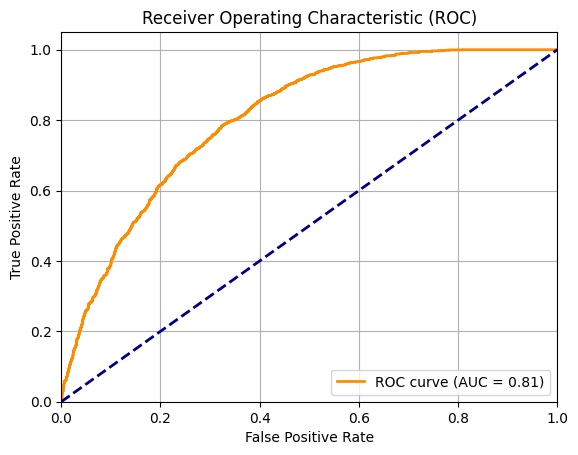

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [350]}
grid = GridSearchCV(GradientBoostingClassifier(learning_rate=0.15, max_depth=4), params, cv=10)
grid.fit(X_train, y_train)
print("Best n_estimators:", grid.best_params_['n_estimators'])

y_scores = grid.predict_proba(X_test)[:, 1]  # Get probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Random Forest ###

Index(['goal', 'disable_communication', 'static_usd_rate', 'name_len_clean',
       'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr',
       'created_at_month', 'created_at_day', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days',
       'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend', 'app', 'help',
       'new', 'world', 'canceled', 'country_grouped_CA', 'country_grouped_GB',
       'country_grouped_Other', 'country_grouped_US', 'currency_grouped_CAD',
       'currency_grouped_EUR', 'currency_grouped_GBP',
       'currency_grouped_Other', 'currency_grouped_USD',
       'deadline_weekday_Friday', 'deadline_weekday_Monday',
       'deadline_weekday_Saturday', 'deadline_weekday_Sunday',
       'deadline_weekday_Thursday', 'deadline_weekday_Tuesday',
       'deadline_weekday_Wednesday', 'created_at_weekday_Friday',
       'created_at_weekday_Monday', 'created_at

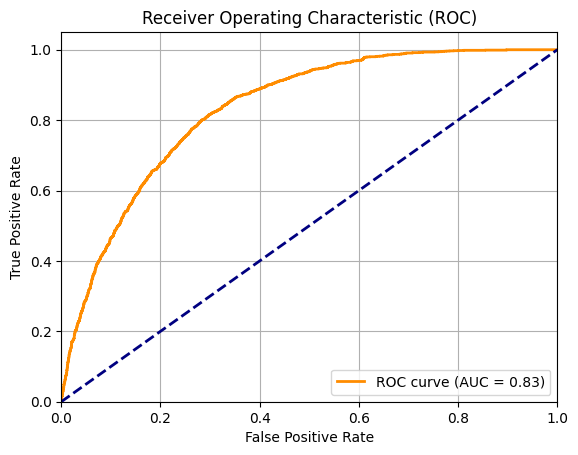

In [71]:
from sklearn.ensemble import RandomForestClassifier

print(X_train.columns)
#X_train.drop('name_len_clean', inplace=True, axis=1)
#X_test.drop('name_len_clean', inplace=True, axis=1)

rf = RandomForestClassifier(n_estimators=650, max_depth=13, random_state=42)
rf.fit(X_train, y_train)

y_scores = rf.predict_proba(X_test)[:, 1]  # Get probability for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()